# Imports

In [5]:
# HIDE 
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import sys
sys.path.append('../')
sys.path.append('../../')

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import time
from fairness.avd_helpers import *
import pandas as pd
import seaborn as sns

pip install 'aif360[LawSchoolGPA]'


In [4]:
sns.set_palette('Set1')

# Loading

In [5]:
adult = pd.read_csv('../results/adult/comp_df_ext.csv').rename({'Unnamed: 0':'index'}, axis=1).set_index('index')
adult = adult.assign(sex = (adult.sex=='Male')*1)
bank = pd.read_csv('../results/bank/test_results.csv').rename({'Unnamed: 0':'index'}, axis=1).set_index('index')
compas = pd.read_csv('../results/compas/compas_test.csv').rename({'Unnamed: 0':'index'}, axis=1).set_index('index')
credit = pd.read_csv('../results/credit/test_results.csv').rename({'Unnamed: 0':'index'}, axis=1).set_index('index')
dutch = pd.read_csv('../results/dutch/preds_2.csv').rename({'Unnamed: 0':'index'}, axis=1).set_index('index')

# Metrics

In [6]:
get_metrics(
    [
        adult[['sex', 'target', 'adv_pred', 'biased_pred']].rename({'biased_pred':'biased_label', 'adv_pred':'fair_label'}, axis=1),
        adult[['sex', 'target', 'lfr_pred']].rename({'lfr_pred':'fair_label'}, axis=1),
        adult[['sex', 'target', 'roc_pred']].rename({'roc_pred':'fair_label'}, axis=1),
        adult[['sex', 'target', 'adveq_pred']].rename({'adveq_pred':'fair_label'}, axis=1),
        adult[['sex', 'target', 'eq_pred']].rename({'eq_pred':'fair_label'}, axis=1)
    ],
    ['adversarial (DP)', 'lfr', 'roc', 'adversarial (Equal Odds)', 'Equal Odds'],
    sensitive_feature='sex'
)[['approach', 'accuracy', 'balanced accuracy', 'p% rules', 'eo_ratios', 'eo_diffs']]

,approach,accuracy,balanced accuracy,p% rules,eo_ratios,eo_diffs
0,adversarial (DP),0.832135,0.701632,97.488759,0.526806,0.355291
1,lfr,0.818551,0.705830,97.491806,0.551504,0.329569
2,roc,0.823038,0.652195,94.103035,0.464120,0.300282
3,adversarial (Equal Odds),0.833917,0.744334,55.549299,0.735388,0.075548
4,Equal Odds,0.839818,0.740995,51.646725,0.727775,0.033442
5,biased,0.851804,0.779362,31.450470,0.233066,0.088344


In [7]:
get_metrics(
    [
        bank[['age_cat', 'target', 'adv_pred', 'biased_pred']].rename({'biased_pred':'biased_label', 'adv_pred':'fair_label'}, axis=1),
        bank[['age_cat', 'target', 'lfr_pred']].rename({'lfr_pred':'fair_label'}, axis=1),
        bank[['age_cat', 'target', 'roc_pred']].rename({'roc_pred':'fair_label'}, axis=1),
        bank[['age_cat', 'target', 'adv_eq_pred']].rename({'adv_eq_pred':'fair_label'}, axis=1),
        bank[['age_cat', 'target', 'eq_pred']].rename({'eq_pred':'fair_label'}, axis=1)
    ],
    ['adversarial (DP)', 'lfr', 'roc', 'adversarial (Equal Odds)', 'Equal Odds'],
    sensitive_feature='age_cat'
)[['approach', 'accuracy', 'balanced accuracy', 'p% rules', 'eo_ratios', 'eo_diffs']]

,approach,accuracy,balanced accuracy,p% rules,eo_ratios,eo_diffs
0,adversarial (DP),0.905333,0.682051,85.122730,0.668852,0.155891
1,lfr,0.904500,0.705743,84.391604,0.752087,0.126856
2,roc,0.904833,0.681769,86.972512,0.722247,0.126694
3,adversarial (Equal Odds),0.887833,0.721134,65.583832,0.755961,0.018359
4,Equal Odds,0.880333,0.811007,62.038931,0.688199,0.039156
5,biased,0.905833,0.733838,44.036715,0.426458,0.109457


In [8]:
get_metrics(
    [
        compas[['race', 'target', 'adv_pred', 'biased_pred']].rename({'biased_pred':'biased_label', 'adv_pred':'fair_label'}, axis=1),
        compas[['race', 'target', 'lfr_pred']].rename({'lfr_pred':'fair_label'}, axis=1),
        compas[['race', 'target', 'roc_pred']].rename({'roc_pred':'fair_label'}, axis=1),
        compas[['race', 'target', 'adveq_pred']].rename({'adveq_pred':'fair_label'}, axis=1),
        compas[['race', 'target', 'eq_pred']].rename({'eq_pred':'fair_label'}, axis=1)
    ],
    ['adversarial (DP)', 'lfr', 'roc', 'adversarial (Equal Odds)', 'Equal Odds'],
    sensitive_feature='race'
)[['approach', 'accuracy', 'balanced accuracy', 'p% rules', 'eo_ratios', 'eo_diffs']]

,approach,accuracy,balanced accuracy,p% rules,eo_ratios,eo_diffs
0,adversarial (DP),0.726033,0.722815,93.309167,0.816821,0.070484
1,lfr,0.702160,0.699045,90.414089,0.566292,0.183896
2,roc,0.698371,0.702859,94.931727,0.592908,0.089219
3,adversarial (Equal Odds),0.649110,0.642387,87.092019,0.935683,0.034521
4,Equal Odds,0.737401,0.735395,80.552107,0.962594,0.011940
5,biased,0.737401,0.736289,53.452004,0.467372,0.249764


In [9]:
get_metrics(
    [
        credit[['sex', 'target', 'adv_dp_pred', 'biased_pred']].rename({'biased_pred':'biased_label', 'adv_dp_pred':'fair_label'}, axis=1),
        credit[['sex', 'target', 'lfr_pred']].rename({'lfr_pred':'fair_label'}, axis=1),
        credit[['sex', 'target', 'roc_pred']].rename({'roc_pred':'fair_label'}, axis=1),
        credit[['sex', 'target', 'adv_eq_pred']].rename({'adv_eq_pred':'fair_label'}, axis=1),
        credit[['sex', 'target', 'eq_pred']].rename({'eq_pred':'fair_label'}, axis=1)
    ],
    ['adversarial (DP)', 'lfr', 'roc', 'adversarial (Equal Odds)', 'Equal Odds'],
    sensitive_feature='sex'
)[['approach', 'accuracy', 'balanced accuracy', 'p% rules', 'eo_ratios', 'eo_diffs']]

,approach,accuracy,balanced accuracy,p% rules,eo_ratios,eo_diffs
0,adversarial (DP),0.812933,0.634662,98.091482,0.912603,0.028595
1,lfr,0.803667,0.624073,97.107644,0.921884,0.024406
2,roc,0.816867,0.649594,98.784138,0.897500,0.037479
3,adversarial (Equal Odds),0.812267,0.641354,88.757159,0.959871,0.012960
4,Equal Odds,0.812467,0.666190,92.316824,0.953595,0.007975
5,biased,0.810867,0.674118,85.721006,0.862370,0.017236


In [10]:
get_metrics(
    [
        dutch[['sex', 'target', 'adv_pred', 'biased_pred']].rename({'biased_pred':'biased_label', 'adv_pred':'fair_label'}, axis=1),
        dutch[['sex', 'target', 'lfr_pred']].rename({'lfr_pred':'fair_label'}, axis=1),
        dutch[['sex', 'target', 'roc_pred']].rename({'roc_pred':'fair_label'}, axis=1),
        dutch[['sex', 'target', 'adveq_pred']].rename({'adveq_pred':'fair_label'}, axis=1),
        dutch[['sex', 'target', 'eq_pred']].rename({'eq_pred':'fair_label'}, axis=1)
    ],
    ['adversarial (DP)', 'lfr', 'roc', 'adversarial (Equal Odds)', 'Equal Odds'],
    sensitive_feature='sex'
)[['approach', 'accuracy', 'balanced accuracy', 'p% rules', 'eo_ratios', 'eo_diffs']]

,approach,accuracy,balanced accuracy,p% rules,eo_ratios,eo_diffs
0,adversarial (DP),0.703608,0.698110,95.437786,0.707974,0.160180
1,lfr,0.751672,0.748985,98.491631,0.368341,0.175238
2,roc,0.762099,0.753223,96.905933,0.597542,0.289626
3,adversarial (Equal Odds),0.755611,0.758074,75.427701,0.964257,0.012523
4,Equal Odds,0.796359,0.791361,63.709185,0.969468,0.007022
5,biased,0.830056,0.829620,45.648520,0.224911,0.248197


In [11]:
adult.head(1)

,age,workclass,fnlwgt,education,education_num,martial_status,occupation,relationship,race,sex,...,adv_pred,lfr_pred,eq_pred,roc_pred,adveq_pred,adv_change,lfr_change,roc_change,eq_change,adveq_change
index,,,,,,,,,,,,,,,,,,,,,
24652,27,Private,50132,Some-college,10,Divorced,Sales,Not-in-family,White,1,...,0.0,0,0,0.0,0,0.0,0,0.0,0,0


In [27]:
def disparate_mistreatment(data, sensitive_attribute, priv_value=1):
    tn_priv = len(data[(data.target==0) & (data[sensitive_attribute]==priv_value)])
    tn_disadv = len(data[(data.target==0) & (data[sensitive_attribute]!=priv_value)])

    tp_priv = len(data[(data.target==1) & (data[sensitive_attribute]==priv_value)])
    tp_disadv = len(data[(data.target==1) & (data[sensitive_attribute]!=priv_value)])
    
    fpr_priv, tpr_priv = metrics.confusion_matrix(
        data[data[sensitive_attribute]==priv_value].target,
        data[data[sensitive_attribute]==priv_value].fair_label,
        normalize='true'
    )[[0,1],1]
    
    fpr_disadv, tpr_disadv = metrics.confusion_matrix(
        data[data[sensitive_attribute]!=priv_value].target,
        data[data[sensitive_attribute]!=priv_value].fair_label,
        normalize='true'
    )[[0,1],1]
    
    #return fpr_disadv#, fpr_priv
    #return (abs(fpr_priv/tn_priv*100 - fpr_disadv/tn_disadv*100),
    #    abs(tpr_priv/tp_priv*100 - tpr_disadv/tp_disadv*100))
    return (abs(fpr_priv - fpr_disadv), abs(tpr_priv - tpr_disadv))

In [13]:
fpr_priv, tpr_priv = metrics.confusion_matrix(
        dutch_scores[dutch_scores.sex==1].target,
        dutch_scores[dutch_scores.sex==1].biased_pred
    )[[0,1],1]
print('Biased:')
print('Men:')
print(f'FPR = {fpr_priv / tn_priv * 100}, TPR = {tpr_priv / tp_priv * 100}')

fpr_priv, tpr_priv = metrics.confusion_matrix(
        dutch_scores[dutch_scores.sex==0].target,
        dutch_scores[dutch_scores.sex==0].biased_pred
    )[[0,1],1]

print('Women:')
print(f'FPR = {fpr_priv / tn_disadv * 100}, TPR = {tpr_priv / tp_disadv * 100}')
print()

fpr_priv, tpr_priv = metrics.confusion_matrix(
        dutch_scores[dutch_scores.sex==1].target,
        dutch_scores[dutch_scores.sex==1].eq_pred
    )[[0,1],1]

print('Equal Odds')
print('Men:')
print(f'FPR = {fpr_priv / tn_priv * 100}, TPR = {tpr_priv / tp_priv * 100}')

fpr_priv, tpr_priv = metrics.confusion_matrix(
        dutch_scores[dutch_scores.sex==0].target,
        dutch_scores[dutch_scores.sex==0].eq_pred
    )[[0,1],1]

print('Women:')
print(f'FPR = {fpr_priv / tn_disadv * 100}, TPR = {tpr_priv / tp_disadv * 100}')
print()

fpr_priv, tpr_priv = metrics.confusion_matrix(
        dutch_scores[dutch_scores.sex==1].target,
        dutch_scores[dutch_scores.sex==1].adveq_pred
    )[[0,1],1]

print('Adversarial')
print('Men:')
print(f'FPR = {fpr_priv / tn_priv * 100}, TPR = {tpr_priv / tp_priv * 100}')

fpr_priv, tpr_priv = metrics.confusion_matrix(
        dutch_scores[dutch_scores.sex==0].target,
        dutch_scores[dutch_scores.sex==0].adveq_pred
    )[[0,1],1]

print('Women:')
print(f'FPR = {fpr_priv / tn_disadv * 100}, TPR = {tpr_priv / tp_disadv * 100}')

NameError: name 'dutch_scores' is not defined

In [28]:
adv_dm = disparate_mistreatment(adult.rename({'adv_pred':'fair_label'}, axis=1), sensitive_attribute='sex')# / len(adult)
lfr_dm = disparate_mistreatment(adult.rename({'lfr_pred':'fair_label'}, axis=1), sensitive_attribute='sex')# / len(adult)
roc_dm = disparate_mistreatment(adult.rename({'roc_pred':'fair_label'}, axis=1), sensitive_attribute='sex')# / len(adult)
adveq_dm = disparate_mistreatment(adult.rename({'adveq_pred':'fair_label'}, axis=1), sensitive_attribute='sex')# / len(adult)
eq_dm = disparate_mistreatment(adult.rename({'eq_pred':'fair_label'}, axis=1), sensitive_attribute='sex')# / len(adult)
biased_dm = disparate_mistreatment(adult.rename({'biased_pred':'fair_label'}, axis=1), sensitive_attribute='sex')# / len(adult)

#print(f'Adversarial (DP): {adv_dm:.2f}')
#print(f'LFR: {lfr_dm:.2f}')
#print(f'ROC: {roc_dm:.2f}')
print(f'Biased: {biased_dm}')
print(f'Adversarial: {adveq_dm}')
print(f'Equal Odds: {eq_dm}')

Biased: (0.08834384583044129, 0.07388968647246796)
Adversarial: (0.024412754917939622, 0.07554783253026853)
Equal Odds: (0.0207849502826567, 0.03344179575103845)


In [29]:
adveq_dm = disparate_mistreatment(dutch.rename({'adveq_pred':'fair_label'}, axis=1), sensitive_attribute='sex')# / len(dutch)
eq_dm = disparate_mistreatment(dutch.rename({'eq_pred':'fair_label'}, axis=1), sensitive_attribute='sex') #/ len(dutch)
biased_dm = disparate_mistreatment(dutch.rename({'biased_pred':'fair_label'}, axis=1), sensitive_attribute='sex')# / len(dutch)

#print(f'Adversarial (DP): {adv_dm:.2f}')
#print(f'LFR: {lfr_dm:.2f}')
#print(f'ROC: {roc_dm:.2f}')
print(f'Biased: {biased_dm}')
print(f'Adversarial: {adveq_dm}')
print(f'Equal Odds: {eq_dm}')

Biased: (0.24819729043172, 0.09681503001981673)
Adversarial: (0.010729920611737276, 0.01252311639046555)
Equal Odds: (0.003249986032224178, 0.00702198122677955)


In [30]:
adveq_dm = disparate_mistreatment(credit.rename({'adv_eq_pred':'fair_label'}, axis=1), sensitive_attribute='sex')# / len(credit)
eq_dm = disparate_mistreatment(credit.rename({'eq_pred':'fair_label'}, axis=1), sensitive_attribute='sex')# / len(credit)
biased_dm = disparate_mistreatment(credit.rename({'biased_pred':'fair_label'}, axis=1), sensitive_attribute='sex')# / len(credit)

#print(f'Adversarial (DP): {adv_dm:.2f}')
#print(f'LFR: {lfr_dm:.2f}')
#print(f'ROC: {roc_dm:.2f}'
print(f'Biased: {biased_dm}')
print(f'Adversarial: {adveq_dm}')
print(f'Equal Odds: {eq_dm}')

Biased: (0.012128454685445558, 0.017236082458926383)
Adversarial: (0.0021451049229225944, 0.012959527449205255)
Equal Odds: (0.0034147549310909187, 0.007975036732513097)


In [31]:
adveq_dm = disparate_mistreatment(bank.rename({'adv_eq_pred':'fair_label'}, axis=1), sensitive_attribute='age_cat')# / len(credit)
eq_dm = disparate_mistreatment(bank.rename({'eq_pred':'fair_label'}, axis=1), sensitive_attribute='age_cat')# / len(credit)
biased_dm = disparate_mistreatment(bank.rename({'biased_pred':'fair_label'}, axis=1), sensitive_attribute='age_cat')# / len(credit)

#print(f'Adversarial (DP): {adv_dm:.2f}')
#print(f'LFR: {lfr_dm:.2f}')
#print(f'ROC: {roc_dm:.2f}')
print(f'Biased: {biased_dm}')
print(f'Adversarial: {adveq_dm}')
print(f'Equal Odds: {eq_dm}')

Biased: (0.04049312589701494, 0.109457316761291)
Adversarial: (0.018359443566789542, 0.00147477537380869)
Equal Odds: (0.03915550883333849, 0.02709153836973388)


In [32]:
adveq_dm = disparate_mistreatment(compas.rename({'adveq_pred':'fair_label'}, axis=1), sensitive_attribute='race')# / len(credit)
eq_dm = disparate_mistreatment(compas.rename({'eq_pred':'fair_label'}, axis=1), sensitive_attribute='race')# / len(credit)
biased_dm = disparate_mistreatment(compas.rename({'biased_pred':'fair_label'}, axis=1), sensitive_attribute='race')# / len(credit)

#print(f'Adversarial (DP): {adv_dm:.2f}')
#print(f'LFR: {lfr_dm:.2f}')
#print(f'ROC: {roc_dm:.2f}')
print(f'Biased: {biased_dm}')
print(f'Adversarial: {adveq_dm}')
print(f'Equal Odds: {eq_dm}')

Biased: (0.24976355807760273, 0.2447293447293447)
Adversarial: (0.034520520670001775, 0.019601139601139628)
Equal Odds: (0.011940317081062246, 0.010028490028490045)


# Q1: How many people changed ?

## HERE !

In [257]:
adult_runs = pd.read_csv('../results/runs/adult.csv').drop(columns=['Unnamed: 0']).assign(Dataset = 'Adult')
bank_runs = pd.read_csv('../results/runs/bank.csv').drop(columns=['Unnamed: 0']).assign(Dataset = 'Bank')
compas_runs = pd.read_csv('../results/runs/compas.csv').drop(columns=['Unnamed: 0']).assign(Dataset = 'COMPAS').rename({
    'eq': 'eo', 'adveq':'adv_eo'
}, axis=1)
credit_runs = pd.read_csv('../results/runs/credit.csv').drop(columns=['Unnamed: 0']).assign(Dataset = 'Credit')
dutch_runs = pd.read_csv('../results/runs/dutch.csv').drop(columns=['Unnamed: 0'])
dutch_runs = pd.DataFrame({
    'lfr': dutch_runs[dutch_runs['method']=='LFR']['% of predictions changed'].values[0:8],
    'adv': dutch_runs[dutch_runs.method=='Adversarial \n (DP)']['% of predictions changed'].values[0:8],
    'adv_eo': dutch_runs[dutch_runs.method=='Adversarial \n (EO)']['% of predictions changed'].values[0:8],
    'roc': dutch_runs[dutch_runs.method=='ROC']['% of predictions changed'].values[0:8],
    'eo':  dutch_runs[dutch_runs.method=='Threshold \n Optimizer']['% of predictions changed'].values[0:8]
}, index=range(8)).assign(Dataset = 'Dutch')

In [284]:
adult_plot = pd.concat([
    adult_runs[['adv_eo', 'Dataset']].assign(method='Adversarial \n(Equalized Odds)').rename({'adv_eo': '%'}, axis=1),
    adult_runs[['eo', 'Dataset']].assign(method='Threshold Optimizer').rename({'eo': '%'}, axis=1),
    adult_runs[['lfr', 'Dataset']].assign(method='LFR').rename({'lfr': '%'}, axis=1),
    adult_runs[['adv', 'Dataset']].assign(method='Adversarial \n(Demographic Parity)').rename({'adv': '%'}, axis=1),
    adult_runs[['roc', 'Dataset']].assign(method='ROC').rename({'roc': '%'}, axis=1)
], axis=0)

dutch_plot = pd.concat([
    dutch_runs[['adv_eo', 'Dataset']].assign(method='Adversarial \n(Equalized Odds)').rename({'adv_eo': '%'}, axis=1),
    dutch_runs[['eo', 'Dataset']].assign(method='Threshold Optimizer').rename({'eo': '%'}, axis=1),
    dutch_runs[['lfr', 'Dataset']].assign(method='LFR').rename({'lfr': '%'}, axis=1),
    dutch_runs[['adv', 'Dataset']].assign(method='Adversarial \n(Demographic Parity)').rename({'adv': '%'}, axis=1),
    dutch_runs[['roc', 'Dataset']].assign(method='ROC').rename({'roc': '%'}, axis=1)
], axis=0)

bank_plot = pd.concat([
    bank_runs[['adv_eo', 'Dataset']].assign(method='Adversarial \n(Equalized Odds)').rename({'adv_eo': '%'}, axis=1),
    bank_runs[['eo', 'Dataset']].assign(method='Threshold Optimizer').rename({'eo': '%'}, axis=1),
    bank_runs[['lfr', 'Dataset']].assign(method='LFR').rename({'lfr': '%'}, axis=1),
    bank_runs[['adv', 'Dataset']].assign(method='Adversarial \n(Demographic Parity)').rename({'adv': '%'}, axis=1),
    bank_runs[['roc', 'Dataset']].assign(method='ROC').rename({'roc': '%'}, axis=1)
], axis=0)

compas_plot = pd.concat([
    compas_runs[['adv_eo', 'Dataset']].assign(method='Adversarial \n(Equalized Odds)').rename({'adv_eo': '%'}, axis=1),
    compas_runs[['eo', 'Dataset']].assign(method='Threshold Optimizer').rename({'eo': '%'}, axis=1),
    compas_runs[['lfr', 'Dataset']].assign(method='LFR').rename({'lfr': '%'}, axis=1),
    compas_runs[['adv', 'Dataset']].assign(method='Adversarial \n(Demographic Parity)').rename({'adv': '%'}, axis=1),
    compas_runs[['roc', 'Dataset']].assign(method='ROC').rename({'roc': '%'}, axis=1)
], axis=0)

credit_plot = pd.concat([
    credit_runs[['adv_eo', 'Dataset']].assign(method='Adversarial \n(Equalized Odds)').rename({'adv_eo': '%'}, axis=1),
    credit_runs[['eo', 'Dataset']].assign(method='Threshold Optimizer').rename({'eo': '%'}, axis=1),
    credit_runs[['lfr', 'Dataset']].assign(method='LFR').rename({'lfr': '%'}, axis=1),
    credit_runs[['adv', 'Dataset']].assign(method='Adversarial \n(Demographic Parity)').rename({'adv': '%'}, axis=1),
    credit_runs[['roc', 'Dataset']].assign(method='ROC').rename({'roc': '%'}, axis=1)
], axis=0)

plot_df = pd.concat([adult_plot, dutch_plot, bank_plot, compas_plot, credit_plot])
plot_df.head()

,%,Dataset,method
0,7.953777,Adult,Adversarial \n(Equalized Odds)
1,7.953777,Adult,Adversarial \n(Equalized Odds)
2,14.266396,Adult,Adversarial \n(Equalized Odds)
3,7.289938,Adult,Adversarial \n(Equalized Odds)
4,6.392526,Adult,Adversarial \n(Equalized Odds)


In [276]:
plot_df.method.unique()

array(['Adversarial (Equalized Odds)', 'Threshold Optimizer', 'LFR',
       'Adversarial (Demographic Parity)', 'ROC'], dtype=object)

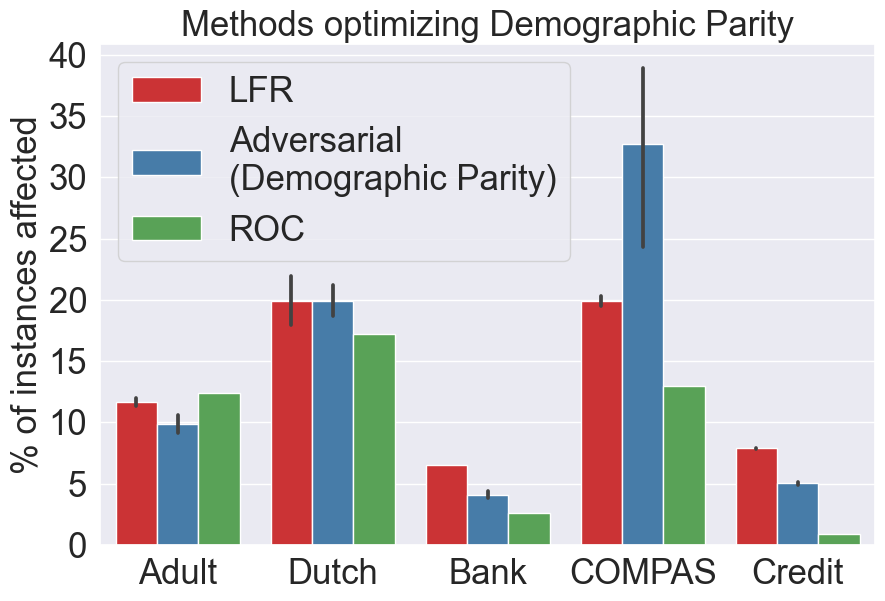

In [283]:
fig, axs = plt.subplots(1,1,figsize=(10,6.5))

sns.barplot(
    data = plot_df[plot_df.method.isin(['LFR',
       'Adversarial \n(Demographic Parity)', 'ROC'])],
    x = 'Dataset',
    y = '%',
    hue = 'method',
    ax=axs
)

axs.set_xlabel('')#, fontsize=25)
plt.xticks(fontsize=25)
plt.legend(fontsize=25)
plt.yticks(fontsize=25)
axs.set_ylabel('% of instances affected', fontsize=25)
axs.set_title('Methods optimizing Demographic Parity', fontsize=25)

plt.savefig('../figs/article/q1_dp_.png')
plt.savefig('../figs/article/q1_dp_.pdf')

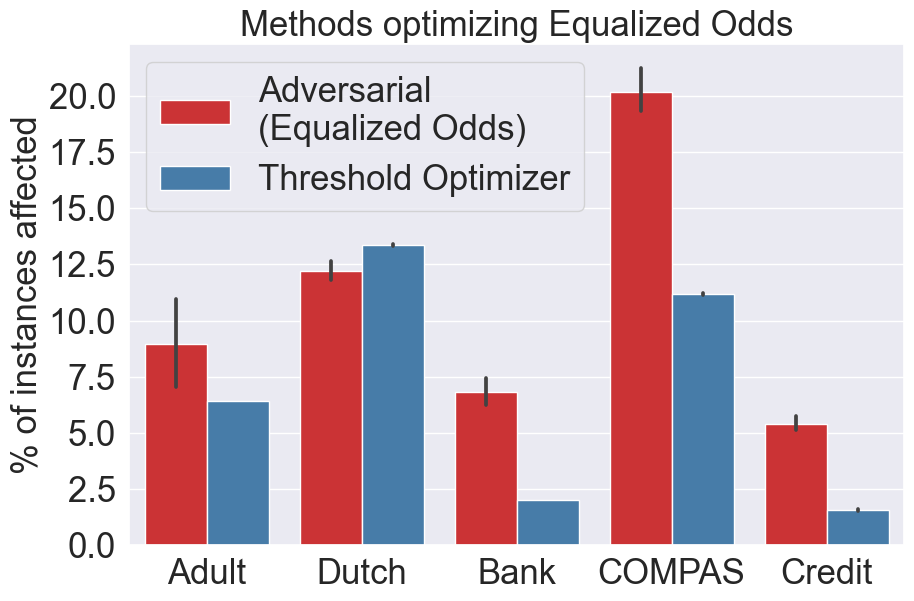

In [287]:
fig, axs = plt.subplots(1,1,figsize=(10,6.5))

sns.barplot(
    data = plot_df[plot_df.method.isin(['Adversarial \n(Equalized Odds)', 'Threshold Optimizer'])],
    x = 'Dataset',
    y = '%',
    hue = 'method',
    ax=axs
)


axs.set_xlabel('')#, fontsize=25)
plt.xticks(fontsize=25)
plt.legend(fontsize=25)
plt.yticks(fontsize=25)
axs.set_ylabel('% of instances affected', fontsize=25)
axs.set_title('Methods optimizing Equalized Odds', fontsize=25)

plt.savefig('../figs/article/q1_eo_.png')
plt.savefig('../figs/article/q1_eo_.pdf')

In [232]:
adult_changed = pd.DataFrame({'Dataset': 'Adult', 'Method': ['LFR', 'Adversarial', 'ROC'],
                              '%': [len(adult[adult.lfr_change!=0])/len(adult) * 100, 
                                    len(adult[adult.adv_change!=0])/len(adult) * 100, 
                                    len(adult[adult.roc_change!=0])/len(adult) * 100]})

compas_changed = pd.DataFrame({'Dataset': 'COMPAS', 'Method': ['LFR', 'Adversarial', 'ROC'],
                              '%': [len(compas[compas.lfr_change!=0])/len(compas) * 100, 
                                    len(compas[compas.adv_change!=0])/len(compas) * 100, 
                                    len(compas[compas.roc_change!=0])/len(compas) * 100]})

credit_changed =  pd.DataFrame({'Dataset': 'Credit', 'Method': ['LFR', 'Adversarial', 'ROC'],
                              '%': [len(credit[credit.lfr_change!=0])/len(credit) * 100, 
                                    len(credit[credit.adv_dp_change!=0])/len(credit) * 100,
                                    len(credit[credit.roc_change!=0])/len(credit) * 100]})

bank_changed =  pd.DataFrame({'Dataset': 'Bank', 'Method': ['LFR', 'Adversarial', 'ROC'],
                              '%': [len(bank[bank.lfr_change!=0])/len(bank) * 100, 
                                    len(bank[bank.adv_change!=0])/len(bank) * 100, 
                                    len(bank[bank.roc_change!=0])/len(bank) * 100]})

dutch_changed =  pd.DataFrame({'Dataset': 'Dutch', 'Method': ['LFR', 'Adversarial', 'ROC'],
                              '%': [len(dutch[dutch.lfr_change!=0])/len(dutch) * 100,
                                    len(dutch[dutch.adv_change!=0])/len(dutch) * 100,
                                    len(dutch[dutch.roc_change!=0])/len(dutch) * 100]})

plot_df = pd.concat([adult_changed, compas_changed, credit_changed, bank_changed, dutch_changed])

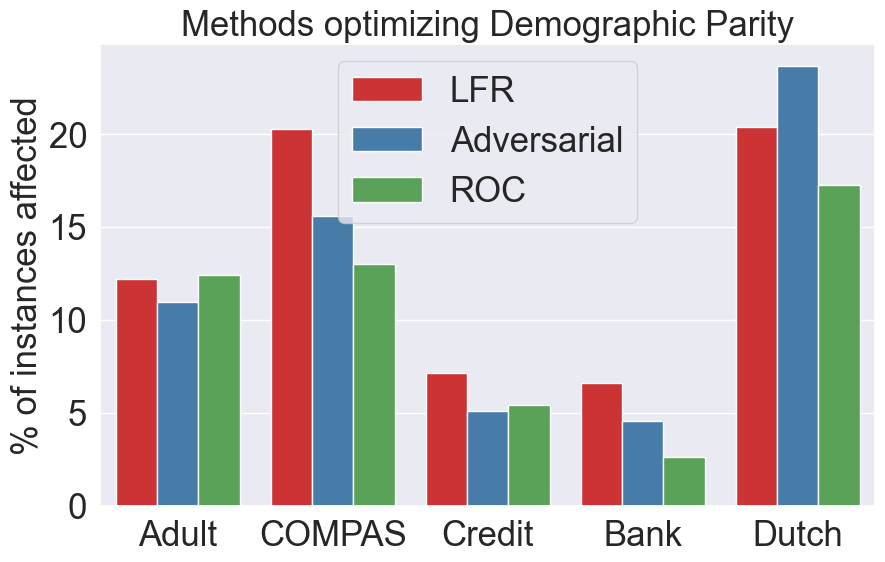

In [215]:
fig, axs = plt.subplots(1,1,figsize=(10,6))

sns.barplot(
    data = plot_df,
    x = 'Dataset',
    y = '%',
    hue = 'Method',
    ax=axs
)

axs.set_xlabel('')#, fontsize=25)
plt.xticks(fontsize=25)
plt.legend(fontsize=25)
plt.yticks(fontsize=25)
axs.set_ylabel('% of instances affected', fontsize=25)
axs.set_title('Methods optimizing Demographic Parity', fontsize=25)

plt.savefig('../figs/article/q1_dp_.png')
plt.savefig('../figs/article/q1_dp_.pdf')

In [208]:
adult_changed = pd.DataFrame({'Dataset': 'Adult', 'Method': ['Adversarial', 'TO'],
                              '%': [len(adult[adult.adveq_change!=0])/len(adult) * 100, 
                                    len(adult[adult.eq_change!=0])/len(adult) * 100]})

compas_changed = pd.DataFrame({'Dataset': 'COMPAS', 'Method': ['Adversarial', 'TO'],
                              '%': [len(compas[compas.adveq_change!=0])/len(compas) * 100,
                                    len(compas[compas.eq_change!=0])/len(compas) * 100]})

credit_changed =  pd.DataFrame({'Dataset': 'Credit', 'Method': ['Adversarial', 'TO'],
                              '%': [len(credit[credit.adv_eq_change!=0])/len(credit) * 100, 
                                    len(credit[credit.eq_change!=0])/len(credit) * 100]})

bank_changed =  pd.DataFrame({'Dataset': 'Bank', 'Method': ['Adversarial', 'TO'],
                              '%': [len(bank[bank.adv_eq_change!=0])/len(bank) * 100,
                                    len(bank[bank.eq_change!=0])/len(bank) * 100]})

dutch_changed =  pd.DataFrame({'Dataset': 'Dutch', 'Method': ['Adversarial', 'TO'],
                              '%': [len(dutch[dutch.adveq_change!=0])/len(dutch) * 100, 
                                    len(dutch[dutch.eq_change!=0])/len(dutch) * 100]})

plot_df = pd.concat([adult_changed, compas_changed, credit_changed, bank_changed, dutch_changed])

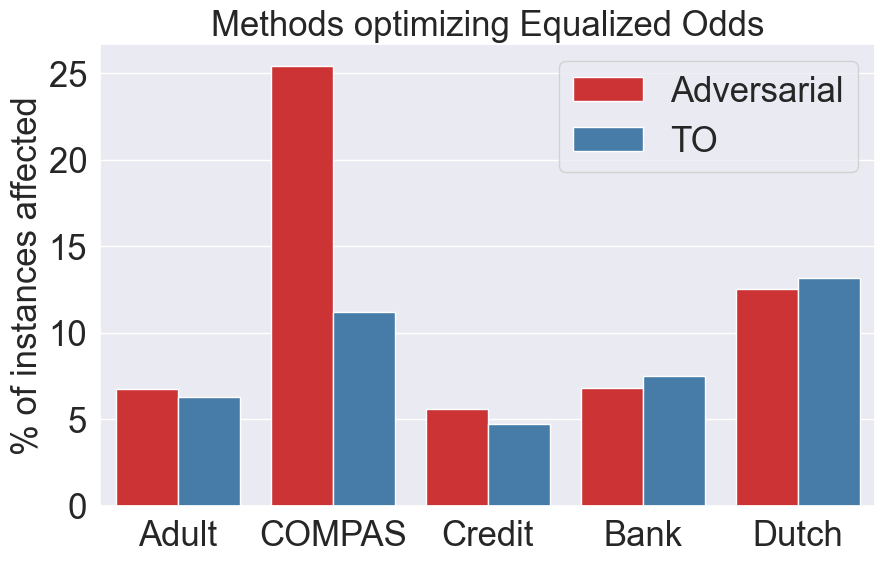

In [210]:
fig, axs = plt.subplots(1,1,figsize=(10,6))

sns.barplot(
    data = plot_df,
    x = 'Dataset',
    y = '%',
    hue = 'Method',
    ax=axs
)


axs.set_xlabel('')#, fontsize=25)
plt.xticks(fontsize=25)
plt.legend(fontsize=25)
plt.yticks(fontsize=25)
axs.set_ylabel('% of instances affected', fontsize=25)
axs.set_title('Methods optimizing Equalized Odds', fontsize=25)

plt.savefig('../figs/article/q1_eo_.png')
plt.savefig('../figs/article/q1_eo_.pdf')

In [211]:
adult_changed = pd.DataFrame({'Dataset': 'Adult', 'Method': ['LFR', 'Adversarial', 'ROC', 'Adversarial (EO)', 'TO'],
                              '%': [len(adult[adult.lfr_change!=0])/len(adult) * 100, 
                                    len(adult[adult.adv_change!=0])/len(adult) * 100, 
                                    len(adult[adult.roc_change!=0])/len(adult) * 100,
                                    len(adult[adult.adveq_change!=0])/len(adult) * 100, 
                                    len(adult[adult.eq_change!=0])/len(adult) * 100]})

compas_changed = pd.DataFrame({'Dataset': 'COMPAS', 'Method': ['LFR', 'Adversarial', 'ROC', 'Adversarial (EO)', 'TO'],
                              '%': [len(compas[compas.lfr_change!=0])/len(compas) * 100, 
                                    len(compas[compas.adv_change!=0])/len(compas) * 100, 
                                    len(compas[compas.roc_change!=0])/len(compas) * 100,
                                    len(compas[compas.adveq_change!=0])/len(compas) * 100,
                                    len(compas[compas.eq_change!=0])/len(compas) * 100]})

credit_changed =  pd.DataFrame({'Dataset': 'Credit', 'Method': ['LFR', 'Adversarial', 'ROC', 'Adversarial (EO)', 'TO'],
                              '%': [len(credit[credit.lfr_change!=0])/len(credit) * 100, 
                                    len(credit[credit.adv_dp_change!=0])/len(credit) * 100,
                                    len(credit[credit.roc_change!=0])/len(credit) * 100,
                                    len(credit[credit.adv_eq_change!=0])/len(credit) * 100, 
                                    len(credit[credit.eq_change!=0])/len(credit) * 100]})

bank_changed =  pd.DataFrame({'Dataset': 'Bank', 'Method': ['LFR', 'Adversarial', 'ROC', 'Adversarial (EO)', 'TO'],
                              '%': [len(bank[bank.lfr_change!=0])/len(bank) * 100, 
                                    len(bank[bank.adv_change!=0])/len(bank) * 100, 
                                    len(bank[bank.roc_change!=0])/len(bank) * 100,
                                    len(bank[bank.adv_eq_change!=0])/len(bank) * 100,
                                    len(bank[bank.eq_change!=0])/len(bank) * 100]})

dutch_changed =  pd.DataFrame({'Dataset': 'Dutch', 'Method': ['LFR', 'Adversarial', 'ROC', 'Adversarial (EO)', 'TO'],
                              '%': [len(dutch[dutch.lfr_change!=0])/len(dutch) * 100,
                                    len(dutch[dutch.adv_change!=0])/len(dutch) * 100,
                                    len(dutch[dutch.roc_change!=0])/len(dutch) * 100,
                                    len(dutch[dutch.adveq_change!=0])/len(dutch) * 100, 
                                    len(dutch[dutch.eq_change!=0])/len(dutch) * 100]})

plot_df = pd.concat([adult_changed, compas_changed, credit_changed, bank_changed, dutch_changed])

<AxesSubplot:xlabel='Dataset', ylabel='%'>

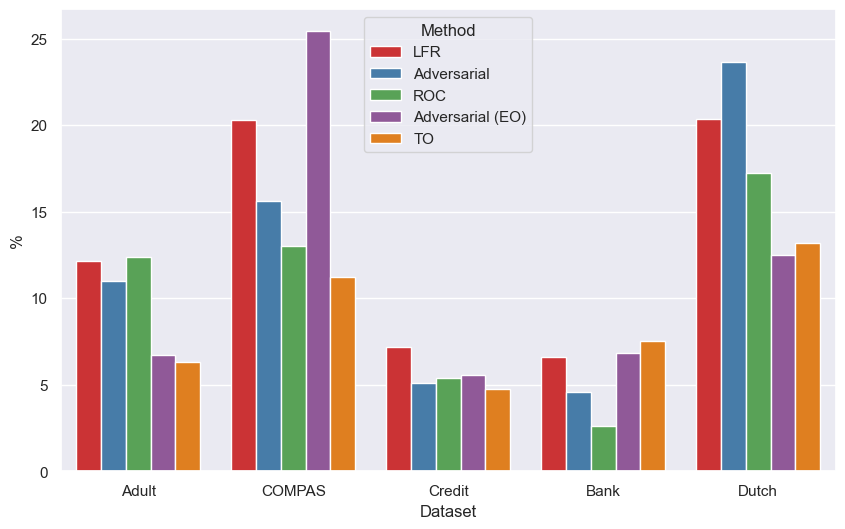

In [11]:
fig, axs = plt.subplots(1,1,figsize=(10,6))

sns.barplot(
    data = plot_df,
    x = 'Dataset',
    y = '%',
    hue = 'Method',
    ax=axs
)

#plt.savefig('../figs/article/q1_dp_eo.png')
#plt.savefig('../figs/article/q1_dp_eo.pdf')

# Q2: How similar are the fair models ?

## Final E[$\hat{Y}$]

### Adult

In [75]:
adult.sex = adult.sex.replace({1: 'male', 0:'female'})

In [76]:
len(adult[(adult.target==1)]) / len(adult) * 100

24.094904419448028

In [77]:
adult_lfr = adult.groupby(['sex', 'lfr_pred']).count()[['age']].assign(card_group = [len(adult[adult.sex=='female']),
                                                                        len(adult[adult.sex=='female']),
                                                                        len(adult[adult.sex=='male']),
                                                                        len(adult[adult.sex=='male'])])
adult_lfr = adult_lfr.assign(percent_of_group = adult_lfr.age.values / adult_lfr.card_group.values * 100)[['percent_of_group']].reset_index().assign(method = 'LFR')

adult_adv = adult.groupby(['sex', 'adv_pred']).count()[['age']].assign(card_group = [len(adult[adult.sex=='female']),
                                                                        len(adult[adult.sex=='female']),
                                                                        len(adult[adult.sex=='male']),
                                                                        len(adult[adult.sex=='male'])])
adult_adv = adult_adv.assign(percent_of_group = adult_adv.age.values / adult_adv.card_group.values * 100)[['percent_of_group']].reset_index().assign(method = 'Adversarial\n (DP)')

adult_roc = adult.groupby(['sex', 'roc_pred']).count()[['age']].assign(card_group = [len(adult[adult.sex=='female']),
                                                                        len(adult[adult.sex=='female']),
                                                                        len(adult[adult.sex=='male']),
                                                                        len(adult[adult.sex=='male'])])
adult_roc = adult_roc.assign(percent_of_group = adult_roc.age.values / adult_roc.card_group.values * 100)[['percent_of_group']].reset_index().assign(method = 'ROC')

adult_adveq = adult.groupby(['sex', 'adveq_pred']).count()[['age']].assign(card_group = [len(adult[adult.sex=='female']),
                                                                        len(adult[adult.sex=='female']),
                                                                        len(adult[adult.sex=='male']),
                                                                        len(adult[adult.sex=='male'])])
adult_adveq = adult_adveq.assign(percent_of_group = adult_adveq.age.values / adult_adveq.card_group.values * 100)[['percent_of_group']].reset_index().assign(method = 'Adversarial\n (EO)')

adult_eq = adult.groupby(['sex', 'eq_pred']).count()[['age']].assign(card_group = [len(adult[adult.sex=='female']),
                                                                        len(adult[adult.sex=='female']),
                                                                        len(adult[adult.sex=='male']),
                                                                        len(adult[adult.sex=='male'])])
adult_eq = adult_eq.assign(percent_of_group = adult_eq.age.values / adult_eq.card_group.values * 100)[['percent_of_group']].reset_index().assign(method = 'TO')

adult_biased = adult.groupby(['sex', 'biased_pred']).count()[['age']].assign(card_group = [len(adult[adult.sex=='female']),
                                                                        len(adult[adult.sex=='female']),
                                                                        len(adult[adult.sex=='male']),
                                                                        len(adult[adult.sex=='male'])])
adult_biased = adult_biased.assign(percent_of_group = adult_biased.age.values / adult_biased.card_group.values * 100)[['percent_of_group']].reset_index().assign(method = 'Biased')

In [78]:
fpr_male_adveq, tpr_male_adveq = metrics.confusion_matrix(adult[adult.sex=='male'].target,
                                              adult[adult.sex=='male'].adveq_pred, 
                                              normalize='true')[[0,1],1]

fpr_female_adveq, tpr_female_adveq = metrics.confusion_matrix(adult[adult.sex=='female'].target, 
                                                  adult[adult.sex=='female'].adveq_pred,
                                                  normalize='true')[[0,1],1]

In [80]:
print('Adversarial:')
print(f'privileged group:')
print(f'FPR = {fpr_male_adveq}, TPR = {tpr_male_adveq}')
print()
print('disadvantaged group:')
print(f'FPR = {fpr_female_adveq}, TPR = {tpr_female_adveq}')

Adversarial:
privileged group:
FPR = 0.09225874867444327, TPR = 0.5599036724864539

disadvantaged group:
FPR = 0.06784599375650364, TPR = 0.6354515050167224


In [81]:
fpr_male_eq, tpr_male_eq = metrics.confusion_matrix(adult[adult.sex=='male'].target,
                                              adult[adult.sex=='male'].eq_pred, 
                                              normalize='true')[[0,1],1]

fpr_female_eq, tpr_female_eq = metrics.confusion_matrix(adult[adult.sex=='female'].target, 
                                                  adult[adult.sex=='female'].eq_pred,
                                                  normalize='true')[[0,1],1]

In [82]:
print('TO:')
print(f'privileged group:')
print(f'FPR = {fpr_male_eq}, TPR = {tpr_male_eq}')
print()
print('disadvantaged group:')
print(f'FPR = {fpr_female_eq}, TPR = {tpr_female_eq}')

TO:
privileged group:
FPR = 0.07635206786850478, TPR = 0.545153521974714

disadvantaged group:
FPR = 0.05556711758584808, TPR = 0.5785953177257525


In [83]:
fpr_male, tpr_male = metrics.confusion_matrix(adult[adult.sex=='male'].target,
                                              adult[adult.sex=='male'].biased_pred, 
                                              normalize='true')[[0,1],1]

fpr_female, tpr_female = metrics.confusion_matrix(adult[adult.sex=='female'].target, 
                                                  adult[adult.sex=='female'].biased_pred,
                                                  normalize='true')[[0,1],1]

In [84]:
print('Biased model:')
print(f'privileged group:')
print(f'FPR = {fpr_male}, TPR = {tpr_male}')
print()
print('disadvantaged group:')
print(f'FPR = {fpr_female}, TPR = {tpr_female}')

Biased model:
privileged group:
FPR = 0.11519088016967126, TPR = 0.6508127633955448

disadvantaged group:
FPR = 0.02684703433922997, TPR = 0.5769230769230769


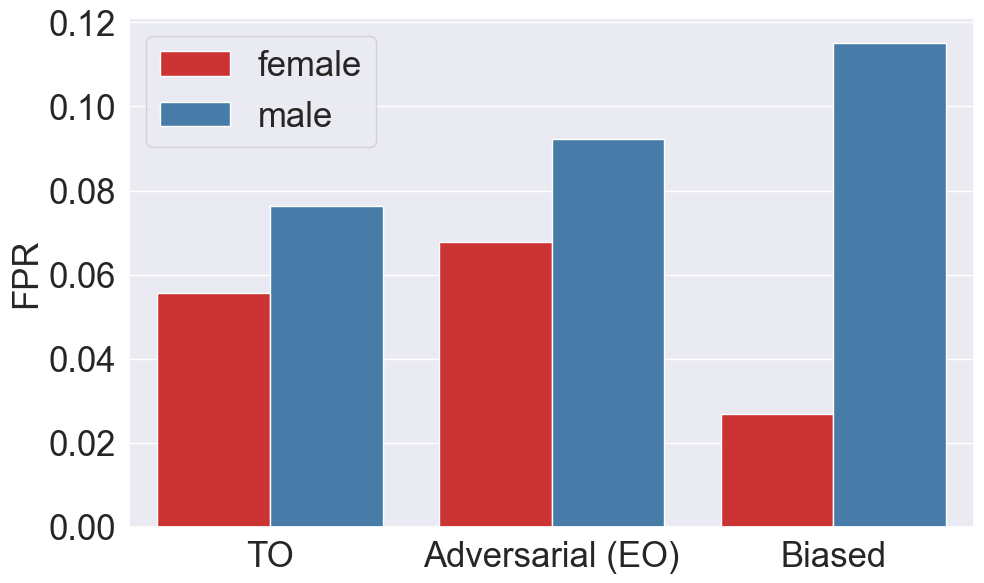

In [90]:
plot_df = pd.DataFrame({
    'FPR': [fpr_male_eq, fpr_female_eq, fpr_male_adveq, fpr_female_adveq, fpr_male, fpr_female],
    'TPR': [tpr_male_eq, tpr_female_eq, tpr_male_adveq, tpr_female_adveq, tpr_male, tpr_female],
    'sex': ['male', 'female', 'male', 'female', 'male', 'female'],
    'method': ['TO', 'TO', 'Adversarial (EO)', 'Adversarial (EO)', 'Biased', 'Biased']
})[['method', 'sex', 'FPR', 'TPR']].sort_values('sex')

fg, axs = plt.subplots(1,1,figsize=(10,6))

sns.barplot(
    data=plot_df,
    x='method',
    y='FPR',
    hue='sex',
    ax=axs
)

axs.set_xlabel('', fontsize=25)
axs.set_ylabel('FPR', fontsize=25)
plt.legend(fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.tight_layout()
plt.savefig('../figs/article/final_state_adult_eo.png')
plt.savefig('../figs/article/final_state_adult_eo.pdf')

In [86]:
adult_lfr

,sex,lfr_pred,percent_of_group,method
0,female,0,82.121044,LFR
1,female,1,17.878956,LFR
2,male,0,82.569483,LFR
3,male,1,17.430517,LFR


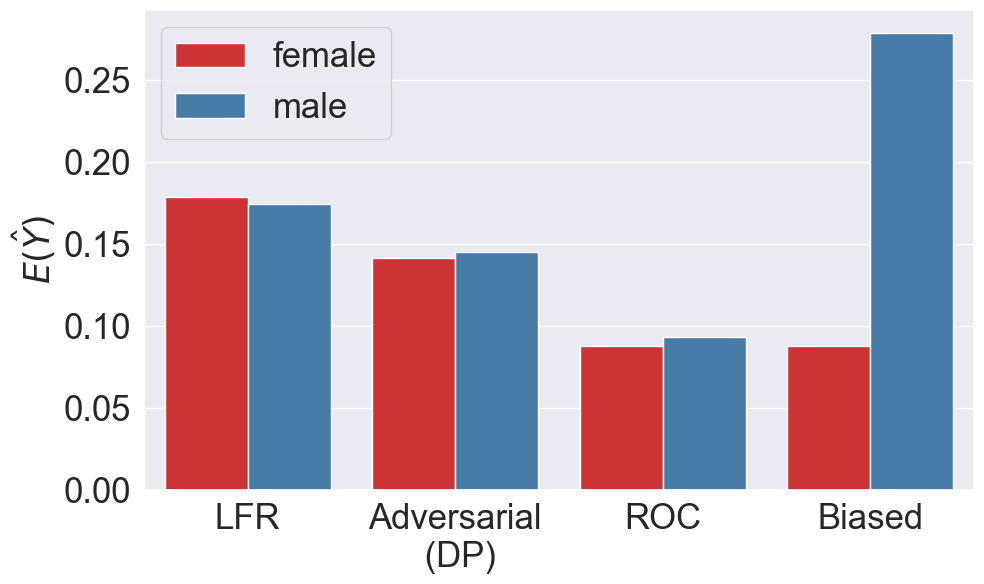

In [89]:
plot_df = pd.concat([
    adult_lfr[adult_lfr.lfr_pred==1],
    adult_adv[adult_adv.adv_pred==1],
    adult_roc[adult_roc.roc_pred==1],
    #adult_adveq[adult_adveq.adveq_pred==1],
    #adult_eq[adult_eq.eq_pred==1],
    adult_biased[adult_biased.biased_pred==1]
])

fig, axs = plt.subplots(1,1,figsize=(10,6))

sns.barplot(
    #data=plot_df,
    x=plot_df['method'],
    y=plot_df['percent_of_group']/100,
    hue=plot_df['sex'],
    ax=axs
)

axs.set_xlabel('', fontsize=25)
axs.set_ylabel(r'$E(\hat{Y})$', fontsize=25)
plt.legend(fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.tight_layout()


plt.savefig('../figs/article/final_state_dp_adult.png')
plt.savefig('../figs/article/final_state_dp_adult.pdf')

In [175]:
plot_df[plot_df.method.isin(['LFR', 'Adversarial (DP)', 'ROC',
       'Biased'])][['method', 'sex', 'percent_of_group']].sort_values(['sex'], ascending=False)

,method,sex,percent_of_group
3,LFR,male,17.430517
3,Adversarial (DP),male,14.485551
3,ROC,male,9.322658
3,Biased,male,27.894349
1,LFR,female,17.878956
1,Adversarial (DP),female,14.121784
1,ROC,female,8.772904
1,Biased,female,8.772904


In [170]:
plot_df.method.unique()

array(['LFR', 'Adversarial (DP)', 'ROC', 'Adversarial (EO)', 'TO',
       'Biased'], dtype=object)

### COMPAS

In [183]:
compas_lfr

,race,lfr_pred,percent_of_group,method
0,Black,0.0,39.671510,LFR
1,Black,1.0,60.328490,LFR
2,White,0.0,45.454545,LFR
3,White,1.0,54.545455,LFR


In [290]:
compas_lfr = compas.groupby(['race', 'lfr_pred']).count()[['target']].assign(card_group = [len(compas[compas.race=='Black']),
                                                                        len(compas[compas.race=='Black']),
                                                                        len(compas[compas.race=='White']),
                                                                        len(compas[compas.race=='White'])])
compas_lfr = compas_lfr.assign(percent_of_group = compas_lfr.target.values / compas_lfr.card_group.values * 100)[['percent_of_group']].reset_index().assign(method = 'LFR')

compas_adv = compas.groupby(['race', 'adv_pred']).count()[['target']].assign(card_group = [len(compas[compas.race=='Black']),
                                                                        len(compas[compas.race=='Black']),
                                                                        len(compas[compas.race=='White']),
                                                                        len(compas[compas.race=='White'])])
compas_adv = compas_adv.assign(percent_of_group = compas_adv.target.values / compas_adv.card_group.values * 100)[['percent_of_group']].reset_index().assign(method = 'Adversarial\n (DP)')

compas_roc = compas.groupby(['race', 'roc_pred']).count()[['target']].assign(card_group = [len(compas[compas.race=='Black']),
                                                                        len(compas[compas.race=='Black']),
                                                                        len(compas[compas.race=='White']),
                                                                        len(compas[compas.race=='White'])])
compas_roc = compas_roc.assign(percent_of_group = compas_roc.target.values / compas_roc.card_group.values * 100)[['percent_of_group']].reset_index().assign(method = 'ROC')

compas_adveq = compas.groupby(['race', 'adveq_pred']).count()[['target']].assign(card_group = [len(compas[compas.race=='Black']),
                                                                        len(compas[compas.race=='Black']),
                                                                        len(compas[compas.race=='White']),
                                                                        len(compas[compas.race=='White'])])
compas_adveq = compas_adveq.assign(percent_of_group = compas_adveq.target.values / compas_adveq.card_group.values * 100)[['percent_of_group']].reset_index().assign(method = 'Adversarial\n (EO)')

compas_eq = compas.groupby(['race', 'eq_pred']).count()[['target']].assign(card_group = [len(compas[compas.race=='Black']),
                                                                        len(compas[compas.race=='Black']),
                                                                        len(compas[compas.race=='White']),
                                                                        len(compas[compas.race=='White'])])
compas_eq = compas_eq.assign(percent_of_group = compas_eq.target.values / compas_eq.card_group.values * 100)[['percent_of_group']].reset_index().assign(method = 'TO')

compas_biased = compas.groupby(['race', 'biased_pred']).count()[['target']].assign(card_group = [len(compas[compas.race=='Black']),
                                                                        len(compas[compas.race=='Black']),
                                                                        len(compas[compas.race=='White']),
                                                                        len(compas[compas.race=='White'])])
compas_biased = compas_biased.assign(percent_of_group = compas_biased.target.values / compas_biased.card_group.values * 100)[['percent_of_group']].reset_index().assign(method = 'Biased')

In [291]:
sns.set_palette('Paired')

In [294]:
fpr_male_adveq, tpr_male_adveq = metrics.confusion_matrix(compas[compas.race=='White'].target,
                                              compas[compas.race=='White'].adveq_pred, 
                                              normalize='true')[[0,1],1]

fpr_female_adveq, tpr_female_adveq = metrics.confusion_matrix(compas[compas.race=='Black'].target, 
                                                  compas[compas.race=='Black'].adveq_pred,
                                                  normalize='true')[[0,1],1]

In [298]:
print('Adversarial:')
print(f'privileged group:')
print(f'FPR = {fpr_male_adveq}, TPR = {tpr_male_adveq}')
print()
print('disadvantaged group:')
print(f'FPR = {fpr_female_adveq}, TPR = {tpr_female_adveq}')

Adversarial:
privileged group:
FPR = 0.536723163841808, TPR = 0.8062678062678063

disadvantaged group:
FPR = 0.5022026431718062, TPR = 0.7866666666666666


In [296]:
fpr_male_eq, tpr_male_eq = metrics.confusion_matrix(compas[compas.race=='White'].target,
                                              compas[compas.race=='White'].eq_pred, 
                                              normalize='true')[[0,1],1]

fpr_female_eq, tpr_female_eq = metrics.confusion_matrix(compas[compas.race=='Black'].target, 
                                                  compas[compas.race=='Black'].eq_pred,
                                                  normalize='true')[[0,1],1]

In [297]:
print('TO:')
print(f'privileged group:')
print(f'FPR = {fpr_male_eq}, TPR = {tpr_male_eq}')
print()
print('disadvantaged group:')
print(f'FPR = {fpr_female_eq}, TPR = {tpr_female_eq}')

TO:
privileged group:
FPR = 0.3192090395480226, TPR = 0.7863247863247863

disadvantaged group:
FPR = 0.30726872246696035, TPR = 0.7762962962962963


In [299]:
fpr_male, tpr_male = metrics.confusion_matrix(compas[compas.race=='White'].target,
                                              compas[compas.race=='White'].biased_pred, 
                                              normalize='true')[[0,1],1]

fpr_female, tpr_female = metrics.confusion_matrix(compas[compas.race=='Black'].target, 
                                                  compas[compas.race=='Black'].biased_pred,
                                                  normalize='true')[[0,1],1]

In [300]:
print('Biased model:')
print(f'privileged group:')
print(f'FPR = {fpr_male}, TPR = {tpr_male}')
print()
print('disadvantaged group:')
print(f'FPR = {fpr_female}, TPR = {tpr_female}')

Biased model:
privileged group:
FPR = 0.4689265536723164, TPR = 0.8817663817663818

disadvantaged group:
FPR = 0.21916299559471367, TPR = 0.6370370370370371


(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

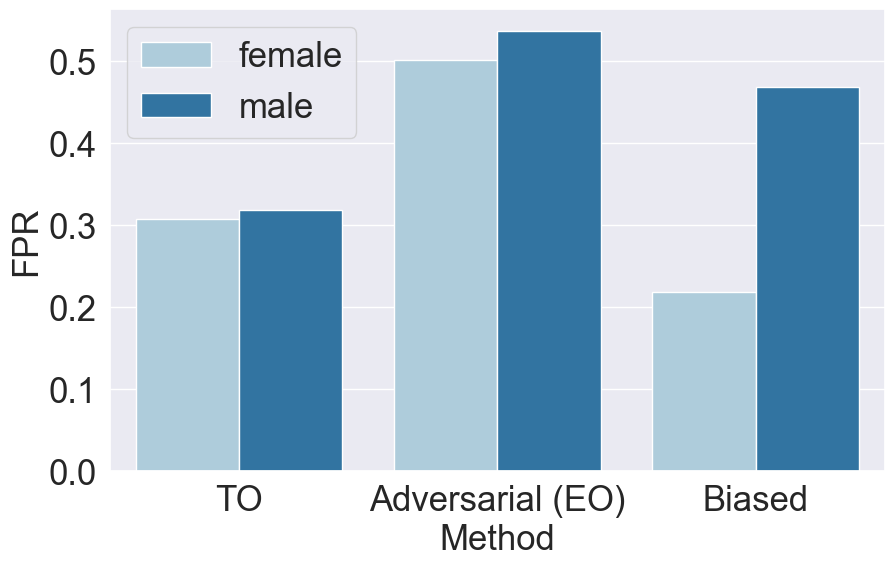

In [301]:
plot_df = pd.DataFrame({
    'FPR': [fpr_male_eq, fpr_female_eq, fpr_male_adveq, fpr_female_adveq, fpr_male, fpr_female],
    'TPR': [tpr_male_eq, tpr_female_eq, tpr_male_adveq, tpr_female_adveq, tpr_male, tpr_female],
    'sex': ['male', 'female', 'male', 'female', 'male', 'female'],
    'method': ['TO', 'TO', 'Adversarial (EO)', 'Adversarial (EO)', 'Biased', 'Biased']
})[['method', 'sex', 'FPR', 'TPR']].sort_values('sex')

fg, axs = plt.subplots(1,1,figsize=(10,6))

sns.barplot(
    data=plot_df,
    x='method',
    y='FPR',
    hue='sex',
    ax=axs
)

axs.set_xlabel('Method', fontsize=25)
axs.set_ylabel('FPR', fontsize=25)
plt.legend(fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

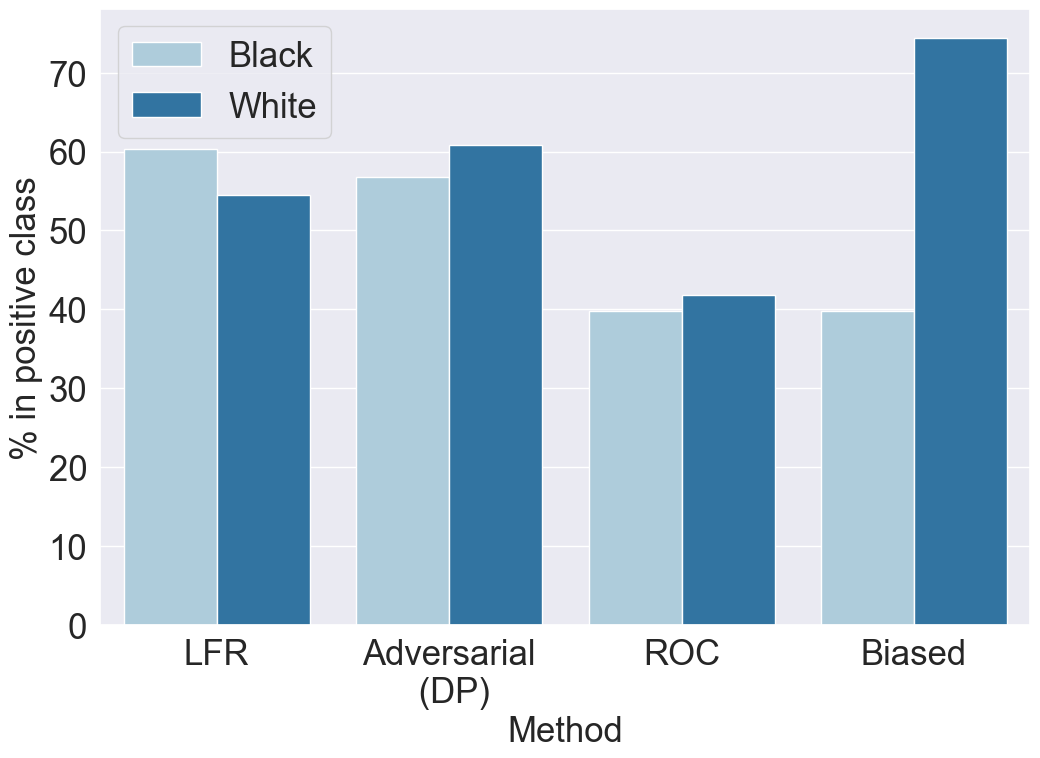

In [243]:
plot_df = pd.concat([
    compas_lfr[compas_lfr.lfr_pred==1],
    compas_adv[compas_adv.adv_pred==1],
    compas_roc[compas_roc.roc_pred==1],
    #compas_adveq[compas_adveq.adveq_pred==1],
    #compas_eq[compas_eq.eq_pred==1],
    compas_biased[compas_biased.biased_pred==1]
])

fig, axs = plt.subplots(1,1,figsize=(12,8))

sns.barplot(
    data=plot_df,
    x='method',
    y='percent_of_group',
    hue='race'
)

axs.set_xlabel('Method', fontsize=25)
axs.set_ylabel('% in positive class', fontsize=25)
plt.legend(fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

plt.savefig('../figs/article/final_state_dp_compas.png')
plt.savefig('../figs/article/final_state_dp_compas.pdf')

In [194]:
plot_df[plot_df.method.isin(['LFR', 'Adversarial\n (DP)', 'ROC',
       'Biased'])][['method', 'race', 'percent_of_group']].sort_values(['race'], ascending=False)

,method,race,percent_of_group
3,LFR,White,54.545455
3,Adversarial\n (DP),White,60.795455
3,ROC,White,41.856061
3,Biased,White,74.337121
1,LFR,Black,60.328490
1,Adversarial\n (DP),Black,56.727732
1,ROC,Black,39.734681
1,Biased,Black,39.734681


### Dutch

In [52]:
dutch.sex = dutch.sex.replace({1:'male', 0:'female'})

In [195]:
dutch_lfr = dutch.groupby(['sex', 'lfr_pred']).count()[['target']].assign(card_group = [len(dutch[dutch.sex=='female']),
                                                                        len(dutch[dutch.sex=='female']),
                                                                        len(dutch[dutch.sex=='male']),
                                                                        len(dutch[dutch.sex=='male'])])
dutch_lfr = dutch_lfr.assign(percent_of_group = dutch_lfr.target.values / dutch_lfr.card_group.values * 100)[['percent_of_group']].reset_index().assign(method = 'LFR')

dutch_adv = dutch.groupby(['sex', 'adv_pred']).count()[['target']].assign(card_group = [len(dutch[dutch.sex=='female']),
                                                                        len(dutch[dutch.sex=='female']),
                                                                        len(dutch[dutch.sex=='male']),
                                                                        len(dutch[dutch.sex=='male'])])
dutch_adv = dutch_adv.assign(percent_of_group = dutch_adv.target.values / dutch_adv.card_group.values * 100)[['percent_of_group']].reset_index().assign(method = 'Adversarial \n (DP)')

dutch_roc = dutch.groupby(['sex', 'roc_pred']).count()[['target']].assign(card_group = [len(dutch[dutch.sex=='female']),
                                                                        len(dutch[dutch.sex=='female']),
                                                                        len(dutch[dutch.sex=='male']),
                                                                        len(dutch[dutch.sex=='male'])])
dutch_roc = dutch_roc.assign(percent_of_group =  dutch_roc.target.values / dutch_roc.card_group.values * 100)[['percent_of_group']].reset_index().assign(method = 'ROC')

dutch_adveq = dutch.groupby(['sex', 'adveq_pred']).count()[['target']].assign(card_group = [len(dutch[dutch.sex=='female']),
                                                                        len(dutch[dutch.sex=='female']),
                                                                        len(dutch[dutch.sex=='male']),
                                                                        len(dutch[dutch.sex=='male'])])
dutch_adveq = dutch_adveq.assign(percent_of_group =  dutch_adveq.target.values / dutch_adveq.card_group.values * 100)[['percent_of_group']].reset_index().assign(method = 'Adversarial \n (EO)')

dutch_eq = dutch.groupby(['sex', 'eq_pred']).count()[['target']].assign(card_group = [len(dutch[dutch.sex=='female']),
                                                                        len(dutch[dutch.sex=='female']),
                                                                        len(dutch[dutch.sex=='male']),
                                                                        len(dutch[dutch.sex=='male'])])
dutch_eq = dutch_eq.assign(percent_of_group =  dutch_eq.target.values / dutch_eq.card_group.values * 100)[['percent_of_group']].reset_index().assign(method = 'TO')

dutch_biased = dutch.groupby(['sex', 'biased_pred']).count()[['target']].assign(card_group = [len(dutch[dutch.sex=='female']),
                                                                        len(dutch[dutch.sex=='female']),
                                                                        len(dutch[dutch.sex=='male']),
                                                                        len(dutch[dutch.sex=='male'])])
dutch_biased = dutch_biased.assign(percent_of_group =  dutch_biased.target.values / dutch_biased.card_group.values * 100)[['percent_of_group']].reset_index().assign(method = 'Biased')

In [196]:
sns.set_palette('Paired')

(array([ 0., 10., 20., 30., 40., 50., 60., 70.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

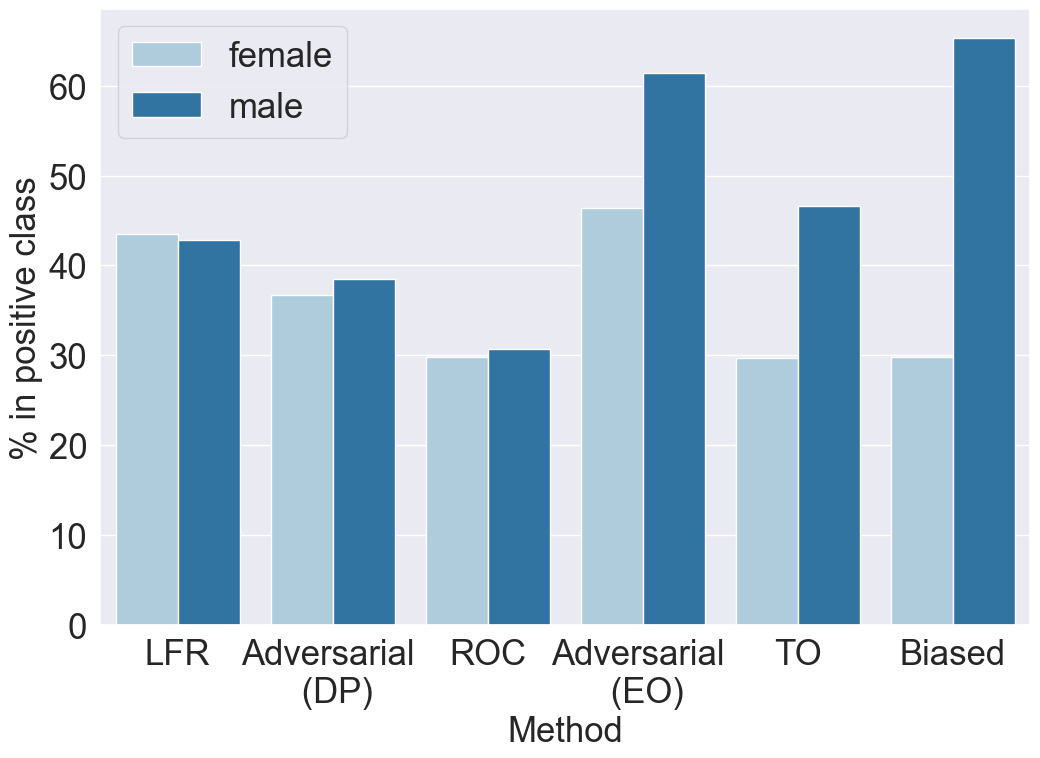

In [197]:
plot_df = pd.concat([
    dutch_lfr[dutch_lfr.lfr_pred==1],
    dutch_adv[dutch_adv.adv_pred==1],
    dutch_roc[dutch_roc.roc_pred==1],
    dutch_adveq[dutch_adveq.adveq_pred==1],
    dutch_eq[dutch_eq.eq_pred==1],
    dutch_biased[dutch_biased.biased_pred==1]
])

fig, axs = plt.subplots(1,1,figsize=(12,8))

sns.barplot(
    data=plot_df,
    x='method',
    y='percent_of_group',
    hue='sex'
)

axs.set_xlabel('Method', fontsize=25)
axs.set_ylabel('% in positive class', fontsize=25)
plt.legend(fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

In [182]:
plot_df[plot_df.method.isin(['LFR', 'Adversarial \n (DP)', 'ROC',
       'Biased'])][['method', 'sex', 'percent_of_group']].sort_values(['sex'], ascending=False)

,method,sex,percent_of_group
3,LFR,male,42.872291
3,Adversarial \n (DP),male,38.458480
3,ROC,male,30.744251
3,Biased,male,65.266088
1,LFR,female,43.528867
1,Adversarial \n (DP),female,36.703922
1,ROC,female,29.793003
1,Biased,female,29.793003


In [181]:
plot_df.method.unique()

array(['LFR', 'Adversarial \n (DP)', 'ROC', 'Adversarial \n (EO)', 'TO',
       'Biased'], dtype=object)

In [198]:
fpr_male, tpr_male = metrics.confusion_matrix(dutch[dutch.sex=='male'].target,
                                              dutch[dutch.sex=='male'].adveq_pred, 
                                              normalize='true')[[0,1],1]

fpr_female, tpr_female = metrics.confusion_matrix(dutch[dutch.sex=='female'].target, 
                                                  dutch[dutch.sex=='female'].adveq_pred,
                                                  normalize='true')[[0,1],1]

In [199]:
print('Adversarial:')
print(f'privileged group:')
print(f'FPR = {fpr_male}, TPR = {tpr_male}')
print()
print('disadvantaged group:')
print(f'FPR = {fpr_female}, TPR = {tpr_female}')

Adversarial:
privileged group:
FPR = 0.3001932197435447, TPR = 0.8051298424861644

disadvantaged group:
FPR = 0.2894632991318074, TPR = 0.8176529588766299


In [200]:
fpr_male, tpr_male = metrics.confusion_matrix(dutch[dutch.sex=='male'].target,
                                              dutch[dutch.sex=='male'].eq_pred, 
                                              normalize='true')[[0,1],1]

fpr_female, tpr_female = metrics.confusion_matrix(dutch[dutch.sex=='female'].target, 
                                                  dutch[dutch.sex=='female'].eq_pred,
                                                  normalize='true')[[0,1],1]

In [201]:
print('TO:')
print(f'privileged group:')
print(f'FPR = {fpr_male}, TPR = {tpr_male}')
print()
print('disadvantaged group:')
print(f'FPR = {fpr_female}, TPR = {tpr_female}')

TO:
privileged group:
FPR = 0.10644651326190058, TPR = 0.6846530438484462

disadvantaged group:
FPR = 0.1031965272296764, TPR = 0.6916750250752257


In [202]:
fpr_male, tpr_male = metrics.confusion_matrix(dutch[dutch.sex=='male'].target,
                                              dutch[dutch.sex=='male'].biased_pred, 
                                              normalize='true')[[0,1],1]

fpr_female, tpr_female = metrics.confusion_matrix(dutch[dutch.sex=='female'].target, 
                                                  dutch[dutch.sex=='female'].biased_pred,
                                                  normalize='true')[[0,1],1]

In [203]:
print('Biased model:')
print(f'privileged group:')
print(f'FPR = {fpr_male}, TPR = {tpr_male}')
print()
print('disadvantaged group:')
print(f'FPR = {fpr_female}, TPR = {tpr_female}')

Biased model:
privileged group:
FPR = 0.32021781134726857, TPR = 0.8540868454661558

disadvantaged group:
FPR = 0.07202052091554854, TPR = 0.757271815446339


In [207]:
plot_df[plot_df.method.isin(['LFR', 'Adversarial \n (DP)', 'ROC',
       'Biased'])][['method', 'sex', 'percent_of_group']].sort_values(['sex'], ascending=False)

,method,sex,percent_of_group
3,LFR,male,42.872291
3,Adversarial \n (DP),male,38.458480
3,ROC,male,30.744251
3,Biased,male,65.266088
1,LFR,female,43.528867
1,Adversarial \n (DP),female,36.703922
1,ROC,female,29.793003
1,Biased,female,29.793003


### Bank

In [208]:
bank_lfr = bank.groupby(['age_cat', 'lfr_pred']).count()[['target']].assign(card_group = [len(bank[bank.age_cat==0]),
                                                                        len(bank[bank.age_cat==0]),
                                                                        len(bank[bank.age_cat==1]),
                                                                        len(bank[bank.age_cat==1])])
bank_lfr = bank_lfr.assign(percent_of_group = bank_lfr.target.values / bank_lfr.card_group.values * 100)[['percent_of_group']].reset_index().assign(method = 'LFR')

bank_adv = bank.groupby(['age_cat', 'adv_pred']).count()[['target']].assign(card_group = [len(bank[bank.age_cat==0]),
                                                                        len(bank[bank.age_cat==0]),
                                                                        len(bank[bank.age_cat==1]),
                                                                        len(bank[bank.age_cat==1])])
bank_adv = bank_adv.assign(percent_of_group = bank_adv.target.values / bank_adv.card_group.values * 100)[['percent_of_group']].reset_index().assign(method = 'Adversarial (DP)')

bank_roc = bank.groupby(['age_cat', 'roc_pred']).count()[['target']].assign(card_group = [len(bank[bank.age_cat==0]),
                                                                        len(bank[bank.age_cat==0]),
                                                                        len(bank[bank.age_cat==1]),
                                                                        len(bank[bank.age_cat==1])])
bank_roc = bank_roc.assign(percent_of_group = bank_roc.target.values / bank_roc.card_group.values * 100)[['percent_of_group']].reset_index().assign(method = 'ROC')

bank_adveq = bank.groupby(['age_cat', 'adv_eq_pred']).count()[['target']].assign(card_group = [len(bank[bank.age_cat==0]),
                                                                        len(bank[bank.age_cat==0]),
                                                                        len(bank[bank.age_cat==1]),
                                                                        len(bank[bank.age_cat==1])])
bank_adveq = bank_adveq.assign(percent_of_group = bank_adveq.target.values / bank_adveq.card_group.values * 100)[['percent_of_group']].reset_index().assign(method = 'Adversarial (EO)')

bank_eq = bank.groupby(['age_cat', 'eq_pred']).count()[['target']].assign(card_group = [len(bank[bank.age_cat==0]),
                                                                        len(bank[bank.age_cat==0]),
                                                                        len(bank[bank.age_cat==1]),
                                                                        len(bank[bank.age_cat==1])])
bank_eq = bank_eq.assign(percent_of_group = bank_eq.target.values / bank_eq.card_group.values * 100)[['percent_of_group']].reset_index().assign(method = 'TO')

bank_biased = bank.groupby(['age_cat', 'biased_pred']).count()[['target']].assign(card_group = [len(bank[bank.age_cat==0]),
                                                                        len(bank[bank.age_cat==0]),
                                                                        len(bank[bank.age_cat==1]),
                                                                        len(bank[bank.age_cat==1])])
bank_biased = bank_biased.assign(percent_of_group = bank_biased.target.values / bank_biased.card_group.values * 100)[['percent_of_group']].reset_index().assign(method = 'Biased')

In [209]:
sns.set_palette('Paired')

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

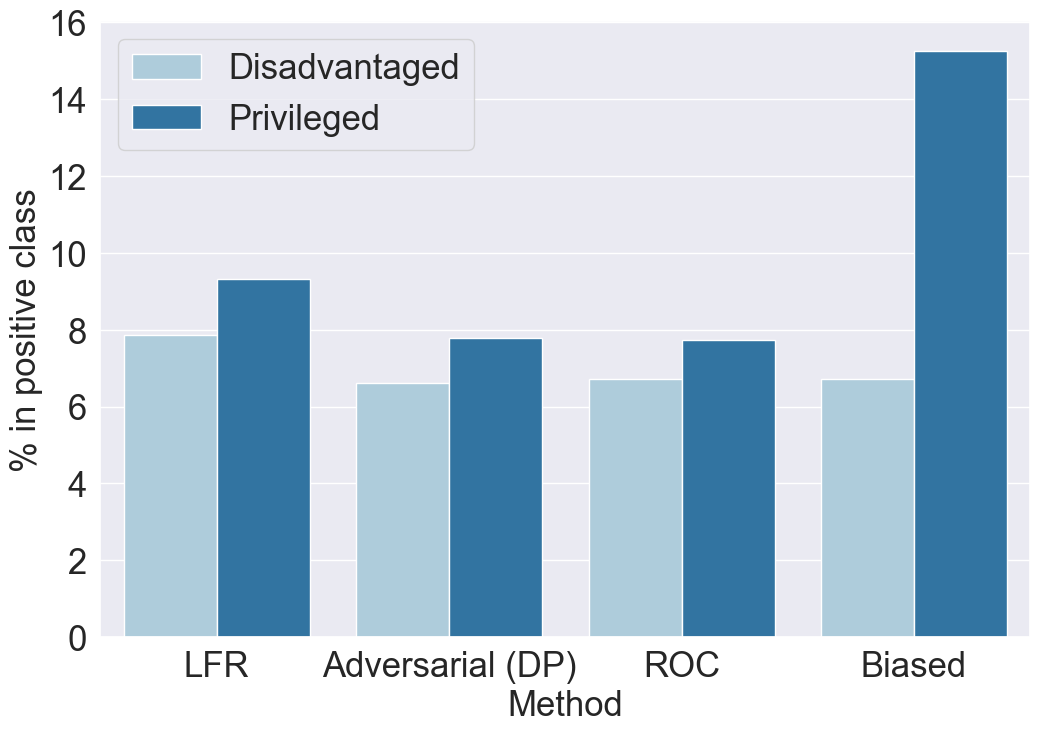

In [210]:
plot_df = pd.concat([
    bank_lfr[bank_lfr.lfr_pred==1],
    bank_adv[bank_adv.adv_pred==1],
    bank_roc[bank_roc.roc_pred==1],
    #bank_adveq[bank_adveq.adv_eq_pred==1],
    #bank_eq[bank_eq.eq_pred==1],
    bank_biased[bank_biased.biased_pred==1]
])

plot_df.age_cat = plot_df.age_cat.replace({0: 'Disadvantaged', 1: 'Privileged'})

fig, axs = plt.subplots(1,1,figsize=(12,8))

sns.barplot(
    data=plot_df,
    x='method',
    y='percent_of_group',
    hue='age_cat'
)

axs.set_xlabel('Method', fontsize=25)
axs.set_ylabel('% in positive class', fontsize=25)
plt.legend(fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

In [211]:
fpr_male, tpr_male = metrics.confusion_matrix(bank[bank.age_cat==1].target,
                                              bank[bank.age_cat==1].adv_eq_pred, 
                                              normalize='true')[[0,1],1]

fpr_female, tpr_female = metrics.confusion_matrix(bank[bank.age_cat==0].target,
                                              bank[bank.age_cat==0].adv_eq_pred, 
                                              normalize='true')[[0,1],1]

In [212]:
print('Adversarial:')
print(f'privileged group:')
print(f'FPR = {fpr_male}, TPR = {tpr_male}')
print()
print('disadvantaged group:')
print(f'FPR = {fpr_female}, TPR = {tpr_female}')

Adversarial:
privileged group:
FPR = 0.07523148148148148, TPR = 0.5043731778425656

disadvantaged group:
FPR = 0.05687203791469194, TPR = 0.5058479532163743


In [213]:
fpr_male, tpr_male = metrics.confusion_matrix(bank[bank.age_cat==1].target,
                                              bank[bank.age_cat==1].eq_pred, 
                                              normalize='true')[[0,1],1]

fpr_female, tpr_female = metrics.confusion_matrix(bank[bank.age_cat==0].target,
                                              bank[bank.age_cat==0].eq_pred, 
                                              normalize='true')[[0,1],1]

In [214]:
print('TO:')
print(f'privileged group:')
print(f'FPR = {fpr_male}, TPR = {tpr_male}')
print()
print('disadvantaged group:')
print(f'FPR = {fpr_female}, TPR = {tpr_female}')

TO:
privileged group:
FPR = 0.1255787037037037, TPR = 0.7346938775510204

disadvantaged group:
FPR = 0.0864231948703652, TPR = 0.7076023391812866


In [215]:
fpr_male, tpr_male = metrics.confusion_matrix(bank[bank.age_cat==1].target,
                                              bank[bank.age_cat==1].biased_pred, 
                                              normalize='true')[[0,1],1]

fpr_female, tpr_female = metrics.confusion_matrix(bank[bank.age_cat==0].target,
                                              bank[bank.age_cat==0].biased_pred, 
                                              normalize='true')[[0,1],1]

In [216]:
print('Biased model:')
print(f'privileged group:')
print(f'FPR = {fpr_male}, TPR = {tpr_male}')
print()
print('disadvantaged group:')
print(f'FPR = {fpr_female}, TPR = {tpr_female}')

Biased model:
privileged group:
FPR = 0.07060185185185185, TPR = 0.565597667638484

disadvantaged group:
FPR = 0.03010872595483691, TPR = 0.45614035087719296


In [220]:
plot_df[plot_df.method.isin(['LFR', 'Adversarial (DP)', 'ROC',
       'Biased'])][['method', 'age_cat', 'percent_of_group']].sort_values(['age_cat'], ascending=False)

,method,age_cat,percent_of_group
3,LFR,Privileged,9.319169
3,Adversarial (DP),Privileged,7.774022
3,ROC,Privileged,7.725736
3,Biased,Privileged,15.258329
1,LFR,Disadvantaged,7.864597
1,Adversarial (DP),Disadvantaged,6.617460
1,ROC,Disadvantaged,6.719267
1,Biased,Disadvantaged,6.719267


### Credit

In [221]:
credit_lfr = credit.groupby(['sex', 'lfr_pred']).count()[['target']].assign(card_group = [len(credit[credit.sex=='female']),
                                                                        len(credit[credit.sex=='female']),
                                                                        len(credit[credit.sex=='male']),
                                                                        len(credit[credit.sex=='male'])])
credit_lfr = credit_lfr.assign(percent_of_group = credit_lfr.target.values / credit_lfr.card_group.values * 100)[['percent_of_group']].reset_index().assign(method = 'LFR')
####

credit_adv = credit.groupby(['sex', 'adv_dp_pred']).count()[['target']].assign(card_group = [len(credit[credit.sex=='female']),
                                                                        len(credit[credit.sex=='female']),
                                                                        len(credit[credit.sex=='male']),
                                                                        len(credit[credit.sex=='male'])])
credit_adv = credit_adv.assign(percent_of_group = credit_adv.target.values / credit_adv.card_group.values * 100)[['percent_of_group']].reset_index().assign(method = 'Adversarial (DP)')
###

credit_roc = credit.groupby(['sex', 'roc_pred']).count()[['target']].assign(card_group = [len(credit[credit.sex=='female']),
                                                                        len(credit[credit.sex=='female']),
                                                                        len(credit[credit.sex=='male']),
                                                                        len(credit[credit.sex=='male'])])
credit_roc = credit_roc.assign(percent_of_group = credit_roc.target.values / credit_roc.card_group.values * 100)[['percent_of_group']].reset_index().assign(method = 'ROC')
###

credit_adveq = credit.groupby(['sex', 'adv_eq_pred']).count()[['target']].assign(card_group = [len(credit[credit.sex=='female']),
                                                                        len(credit[credit.sex=='female']),
                                                                        len(credit[credit.sex=='male']),
                                                                        len(credit[credit.sex=='male'])])
credit_adveq = credit_adveq.assign(percent_of_group = credit_adveq.target.values / credit_adveq.card_group.values * 100)[['percent_of_group']].reset_index().assign(method = 'Adversarial (EO)')
###

credit_eq = credit.groupby(['sex', 'eq_pred']).count()[['target']].assign(card_group = [len(credit[credit.sex=='female']),
                                                                        len(credit[credit.sex=='female']),
                                                                        len(credit[credit.sex=='male']),
                                                                        len(credit[credit.sex=='male'])])
credit_eq = credit_eq.assign(percent_of_group = credit_eq.target.values / credit_eq.card_group.values * 100)[['percent_of_group']].reset_index().assign(method = 'TO')
###

credit_biased = credit.groupby(['sex', 'biased_pred']).count()[['target']].assign(card_group = [len(credit[credit.sex=='female']),
                                                                        len(credit[credit.sex=='female']),
                                                                        len(credit[credit.sex=='male']),
                                                                        len(credit[credit.sex=='male'])])
credit_biased = credit_biased.assign(percent_of_group = credit_biased.target.values / credit_biased.card_group.values * 100)[['percent_of_group']].reset_index().assign(method = 'Biased')


In [222]:
fpr_male, tpr_male = metrics.confusion_matrix(credit[credit.sex=='male'].target,
                                              credit[credit.sex=='male'].adv_eq_pred, 
                                              normalize='true')[[0,1],1]

fpr_female, tpr_female = metrics.confusion_matrix(credit[credit.sex=='female'].target,
                                                  credit[credit.sex=='female'].adv_eq_pred, 
                                                  normalize='true')[[0,1],1]

In [223]:
print('Adversarial:')
print(f'privileged group:')
print(f'FPR = {fpr_male}, TPR = {tpr_male}')
print()
print('disadvantaged group:')
print(f'FPR = {fpr_female}, TPR = {tpr_female}')

Adversarial:
privileged group:
FPR = 0.05345560277342876, TPR = 0.34225352112676055

disadvantaged group:
FPR = 0.05131049785050617, TPR = 0.3292939936775553


In [224]:
fpr_male, tpr_male = metrics.confusion_matrix(credit[credit.sex=='male'].target,
                                              credit[credit.sex=='male'].eq_pred, 
                                              normalize='true')[[0,1],1]

fpr_female, tpr_female = metrics.confusion_matrix(credit[credit.sex=='female'].target,
                                                  credit[credit.sex=='female'].eq_pred, 
                                                  normalize='true')[[0,1],1]

In [225]:
print('TO:')
print(f'privileged group:')
print(f'FPR = {fpr_male}, TPR = {tpr_male}')
print()
print('disadvantaged group:')
print(f'FPR = {fpr_female}, TPR = {tpr_female}')

TO:
privileged group:
FPR = 0.07358532766718855, TPR = 0.39929577464788735

disadvantaged group:
FPR = 0.07017057273609763, TPR = 0.40727081138040044


In [226]:
fpr_male, tpr_male = metrics.confusion_matrix(credit[credit.sex=='male'].target,
                                              credit[credit.sex=='male'].biased_pred, 
                                              normalize='true')[[0,1],1]

fpr_female, tpr_female = metrics.confusion_matrix(credit[credit.sex=='female'].target,
                                                  credit[credit.sex=='female'].biased_pred, 
                                                  normalize='true')[[0,1],1]

In [227]:
print('Biased model:')
print(f'privileged group:')
print(f'FPR = {fpr_male}, TPR = {tpr_male}')
print()
print('disadvantaged group:')
print(f'FPR = {fpr_female}, TPR = {tpr_female}')

Biased model:
privileged group:
FPR = 0.08812346231268173, TPR = 0.4387323943661972

disadvantaged group:
FPR = 0.07599500762723617, TPR = 0.4214963119072708


<AxesSubplot:xlabel='method', ylabel='percent_of_group'>

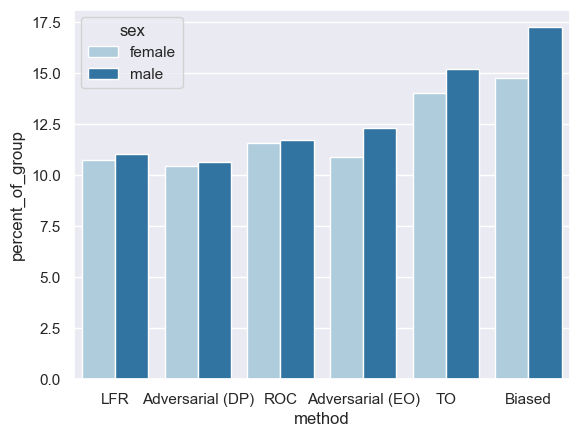

In [228]:
plot_df = pd.concat([
    credit_lfr[credit_lfr.lfr_pred==1],
    credit_adv[credit_adv.adv_dp_pred==1],
    credit_roc[credit_roc.roc_pred==1],
    credit_adveq[credit_adveq.adv_eq_pred==1],
    credit_eq[credit_eq.eq_pred==1],
    credit_biased[credit_biased.biased_pred==1]
])


sns.barplot(
    data=plot_df,
    x='method',
    y='percent_of_group',
    hue='sex'
)

In [230]:
plot_df[plot_df.method.isin(['LFR', 'Adversarial (DP)', 'ROC',
       'Biased'])][['method', 'sex', 'percent_of_group']].sort_values(['sex'], ascending=False)

,method,sex,percent_of_group
3,LFR,male,11.067730
3,Adversarial (DP),male,10.643354
3,ROC,male,11.746732
3,Biased,male,17.263622
1,LFR,female,10.747612
1,Adversarial (DP),female,10.440224
1,ROC,female,11.603908
1,Biased,female,14.798551


## IOU

### Dutch

In [47]:
dutch_lfr = dutch[dutch.lfr_change!=0]
dutch_adv = dutch[dutch.adv_change!=0]
dutch_adveq = dutch[dutch.adveq_change!=0]
dutch_roc = dutch[dutch.roc_change!=0]
dutch_eq = dutch[dutch.eq_change!=0]

#set(dutch_lfr.index).intersection(set(dutch_adv.index)).intersection(set(dutch_adveq.index)).intersection(set(dutch_roc.index)).intersection(set(dutch_eq.index))

inters_dp = dutch[
    (dutch.lfr_change!=0) & (dutch.adv_change!=0) & (dutch.roc_change!=0) 
]

union_dp = dutch[
    (dutch.lfr_change!=0) | (dutch.adv_change!=0) | (dutch.roc_change!=0)
]


inters_eo = dutch[
    (dutch.adveq_change!=0) & (dutch.eq_change!=0)
]

union_eo = dutch[
    (dutch.adveq_change!=0) | (dutch.eq_change!=0)
]

In [48]:
dutch_iou_dp = len(inters_dp) / len(union_dp) * 100
dutch_iou_eo = len(inters_eo) / len(union_eo) * 100

In [49]:
dutch_iou_dp

19.378398117341554

In [50]:
dutch_iou_eo

6.610775151181968

### Adult

In [51]:
inters_dp = adult[
    (adult.lfr_change!=0) & (adult.adv_change!=0) & (adult.roc_change!=0) 
]

union_dp = adult[
    (adult.lfr_change!=0) | (adult.adv_change!=0) | (adult.roc_change!=0)
]


inters_eo = adult[
    (adult.adveq_change!=0) & (adult.eq_change!=0)
]

union_eo = adult[
    (adult.adveq_change!=0) | (adult.eq_change!=0)
]

In [52]:
adult_iou_dp = len(inters_dp) / len(union_dp) * 100
adult_iou_eo = len(inters_eo) / len(union_eo) * 100

In [54]:
adult_iou_dp

29.42559623782331

In [55]:
adult_iou_eo

34.09234661606578

### Credit

In [56]:
inters_dp = credit[
    (credit.lfr_change!=0) & (credit.adv_dp_change!=0) & (credit.roc_change!=0) 
]

union_dp = credit[
    (credit.lfr_change!=0) | (credit.adv_dp_change!=0) | (credit.roc_change!=0)
]


inters_eo = credit[
    (credit.adv_eq_change!=0) & (credit.eq_change!=0)
]

union_eo = credit[
    (credit.adv_eq_change!=0) | (credit.eq_change!=0)
]

In [57]:
credit_iou_dp = len(inters_dp) / len(union_dp) * 100
credit_iou_eo = len(inters_eo) / len(union_eo) * 100

In [58]:
credit_iou_dp

4.183154324477106

In [59]:
credit_iou_eo

30.05050505050505

### Bank

In [60]:
inters_dp = bank[
    (bank.lfr_change!=0) & (bank.adv_change!=0) & (bank.roc_change!=0) 
]

union_dp = bank[
    (bank.lfr_change!=0) | (bank.adv_change!=0) | (bank.roc_change!=0)
]


inters_eo = bank[
    (bank.adv_eq_change!=0) & (bank.eq_change!=0)
]

union_eo = bank[
    (bank.adv_eq_change!=0) | (bank.eq_change!=0)
]

In [61]:
bank_iou_dp = len(inters_dp) / len(union_dp) * 100
bank_iou_eo = len(inters_eo) / len(union_eo) * 100

In [62]:
bank_iou_dp

18.4

In [63]:
bank_iou_eo

22.82453637660485

### COMPAS

In [64]:
inters_dp = compas[
    (compas.lfr_change!=0) & (compas.adv_change!=0) & (compas.roc_change!=0) 
]

union_dp = compas[
    (compas.lfr_change!=0) | (compas.adv_change!=0) | (compas.roc_change!=0)
]


inters_eo = compas[
    (compas.adv_change!=0) & (compas.eq_change!=0)
]

union_eo = compas[
    (compas.adv_change!=0) | (compas.eq_change!=0)
]

In [65]:
compas_iou_dp = len(inters_dp) / len(union_dp) * 100
compas_iou_eo = len(inters_eo) / len(union_eo) * 100

In [66]:
compas_iou_dp

20.549927641099856

In [67]:
compas_iou_eo

67.77251184834124

### Plots

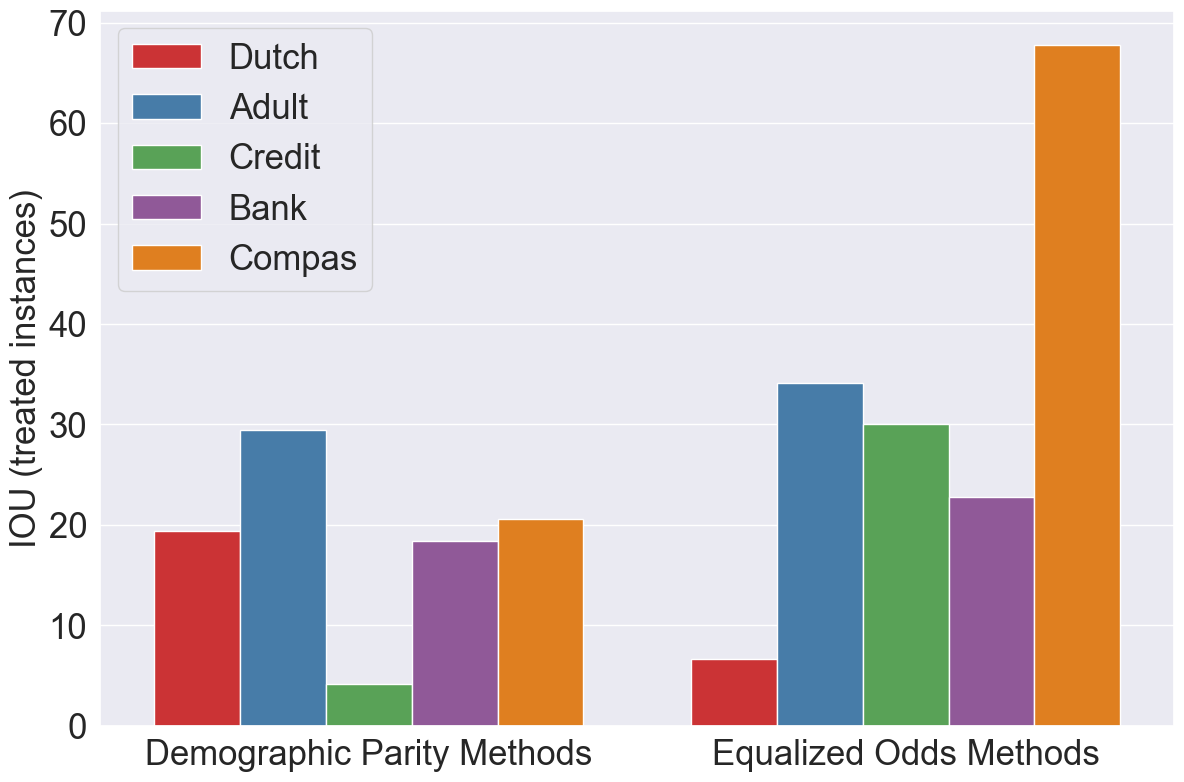

In [99]:
plot_df = pd.DataFrame({
    'IOU': [
        dutch_iou_dp, dutch_iou_eo, 
        adult_iou_dp, adult_iou_eo, 
        credit_iou_dp, credit_iou_eo,
        bank_iou_dp, bank_iou_eo,
        compas_iou_dp, compas_iou_eo
           ],
    'Metric': [
        'Demographic Parity Methods', 'Equalized Odds Methods',
        'Demographic Parity Methods', 'Equalized Odds Methods',
        'Demographic Parity Methods', 'Equalized Odds Methods',
        'Demographic Parity Methods', 'Equalized Odds Methods',
        'Demographic Parity Methods', 'Equalized Odds Methods'
        #, 'DP', 'EO', 'DP', 'EO', 'DP', 'EO', 'DP', 'EO'
    ],
    'Dataset': [
        'Dutch', 'Dutch',
        'Adult', 'Adult',
        'Credit', 'Credit',
        'Bank', 'Bank',
        'Compas', 'Compas'
    ]
})

fig, axs = plt.subplots(1,1,figsize=(12,8))

sns.barplot(
    data = plot_df,
    x = 'Metric',
    y = 'IOU',
    hue = 'Dataset',
    ax=axs
)

axs.set_xlabel('', fontsize=25)
axs.set_ylabel('IOU (treated instances)', fontsize=25)
plt.legend(fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.tight_layout()

plt.savefig('../figs/article/q2_iou.png')
plt.savefig('../figs/article/q2_iou.pdf')

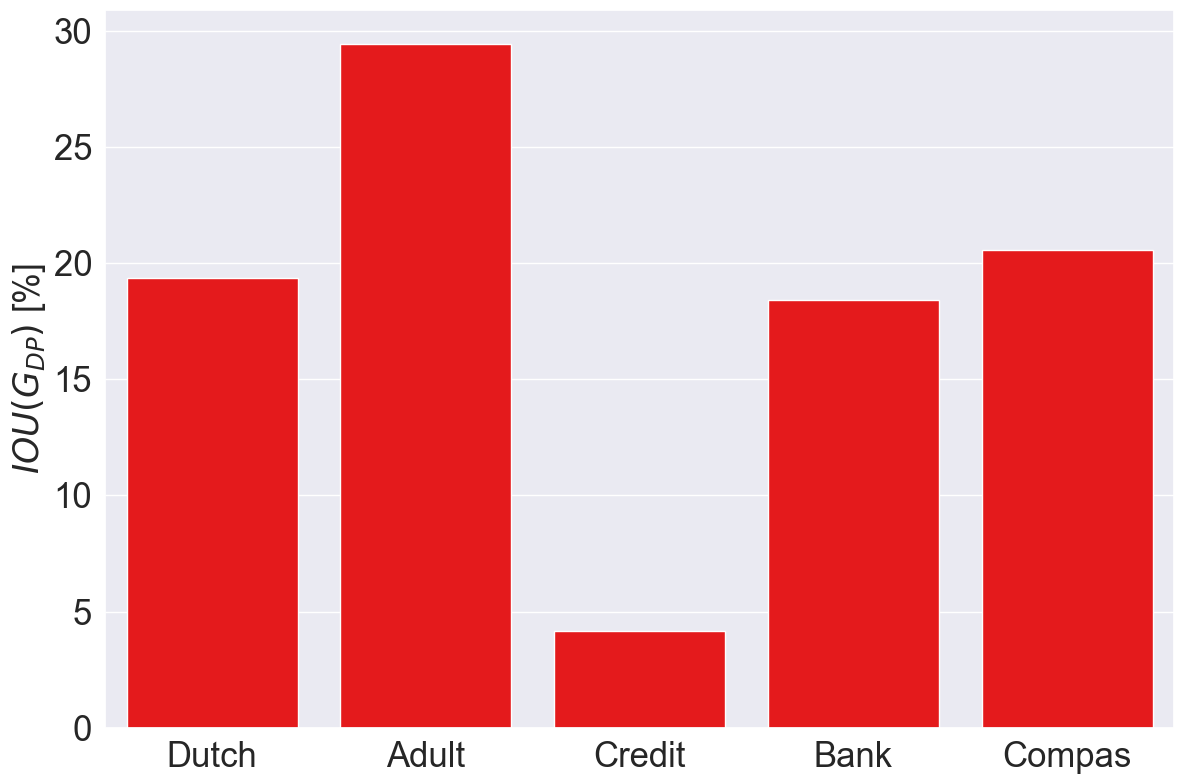

In [131]:
plot_df = pd.DataFrame({
    'IOU': [
        dutch_iou_dp, dutch_iou_eo, 
        adult_iou_dp, adult_iou_eo, 
        credit_iou_dp, credit_iou_eo,
        bank_iou_dp, bank_iou_eo,
        compas_iou_dp, compas_iou_eo
           ],
    'Metric': [
        'DP', 'EO', 'DP', 'EO', 'DP', 'EO', 'DP', 'EO', 'DP', 'EO'
    ],
    'Dataset': [
        'Dutch', 'Dutch',
        'Adult', 'Adult',
        'Credit', 'Credit',
        'Bank', 'Bank',
        'Compas', 'Compas'
    ]
})

fig, axs = plt.subplots(1,1,figsize=(12,8))

sns.barplot(
    data = plot_df[plot_df.Metric=='DP'],
    x = 'Dataset',
    y = 'IOU',
    #hue = 'Metric',
    ax=axs,
    facecolor=sns.color_palette("Set1")[0]
)

axs.set_xlabel('', fontsize=25)
axs.set_ylabel(r'$IOU (G_{DP})$ [%]', fontsize=25)
#plt.legend(fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.tight_layout()

plt.savefig('../figs/article/q2_iou_dp.png')
plt.savefig('../figs/article/q2_iou_dp.pdf')

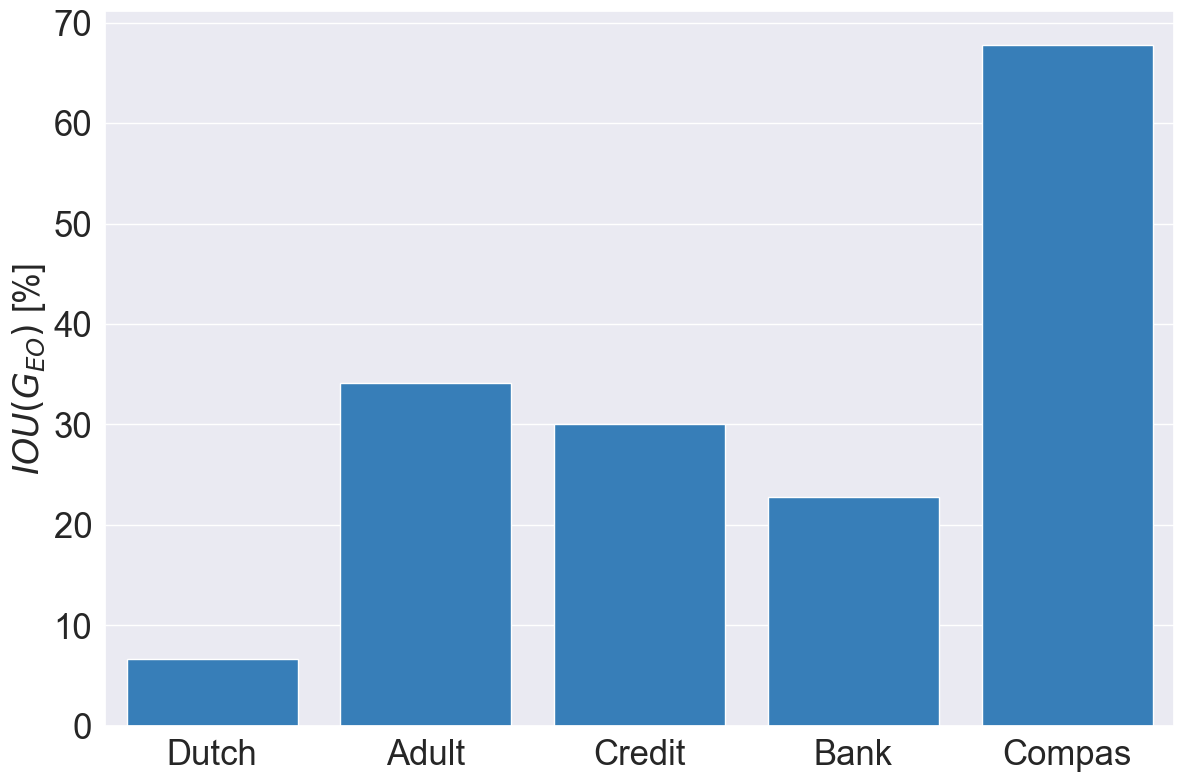

In [130]:
plot_df = pd.DataFrame({
    'IOU': [
        dutch_iou_dp, dutch_iou_eo, 
        adult_iou_dp, adult_iou_eo, 
        credit_iou_dp, credit_iou_eo,
        bank_iou_dp, bank_iou_eo,
        compas_iou_dp, compas_iou_eo
           ],
    'Metric': [
        'DP', 'EO', 'DP', 'EO', 'DP', 'EO', 'DP', 'EO', 'DP', 'EO'
    ],
    'Dataset': [
        'Dutch', 'Dutch',
        'Adult', 'Adult',
        'Credit', 'Credit',
        'Bank', 'Bank',
        'Compas', 'Compas'
    ]
})

fig, axs = plt.subplots(1,1,figsize=(12,8))

sns.barplot(
    data = plot_df[plot_df.Metric=='EO'],
    x = 'Dataset',
    y = 'IOU',
    #hue = 'Metric',
    ax=axs,
    facecolor=sns.color_palette("Set1")[1]
)

axs.set_xlabel('', fontsize=25)
axs.set_ylabel(r'$IOU (G_{EO})$ [%]', fontsize=25)
#plt.legend(fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.tight_layout()

plt.savefig('../figs/article/q2_iou_eo.png')
plt.savefig('../figs/article/q2_iou_eo.pdf')

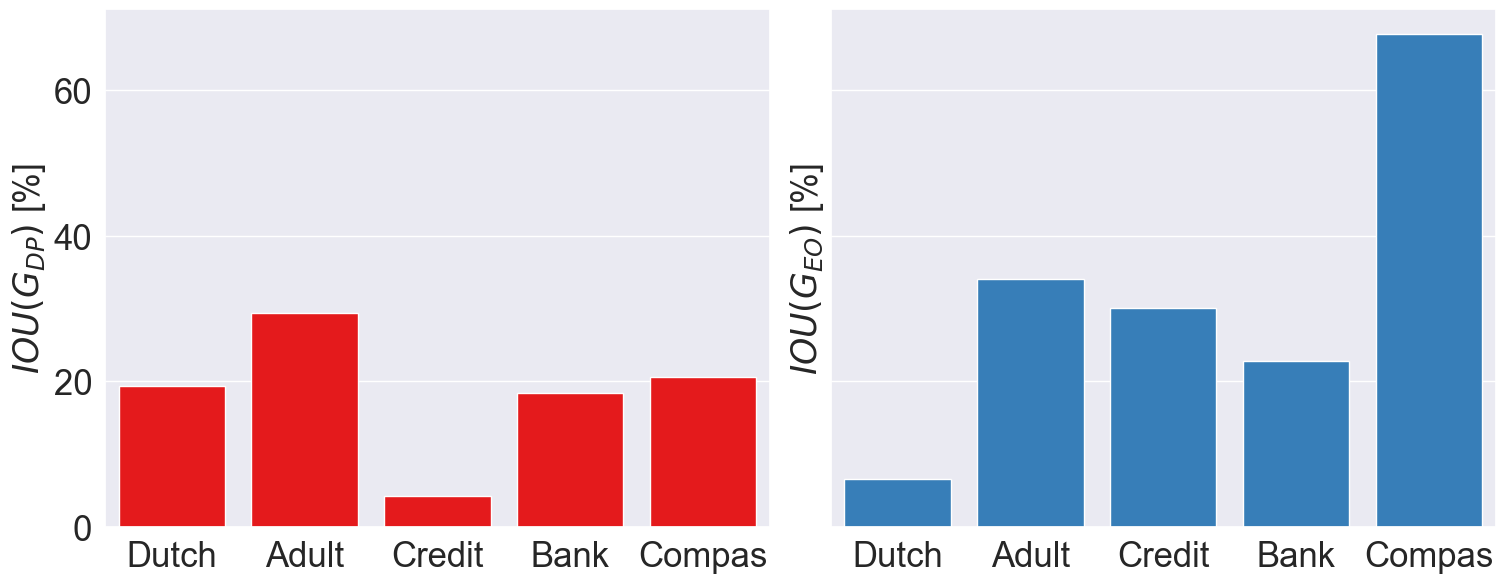

In [136]:
plot_df = pd.DataFrame({
    'IOU': [
        dutch_iou_dp, dutch_iou_eo, 
        adult_iou_dp, adult_iou_eo, 
        credit_iou_dp, credit_iou_eo,
        bank_iou_dp, bank_iou_eo,
        compas_iou_dp, compas_iou_eo
           ],
    'Metric': [
        'DP', 'EO', 'DP', 'EO', 'DP', 'EO', 'DP', 'EO', 'DP', 'EO'
    ],
    'Dataset': [
        'Dutch', 'Dutch',
        'Adult', 'Adult',
        'Credit', 'Credit',
        'Bank', 'Bank',
        'Compas', 'Compas'
    ]
})

fig, axs = plt.subplots(1,2,figsize=(15,6), sharey=True)

sns.barplot(
    data = plot_df[plot_df.Metric=='DP'],
    x = 'Dataset',
    y = 'IOU',
    #hue = 'Metric',
    ax=axs[0],
    facecolor=sns.color_palette("Set1")[0]
)
axs[0].set_xlabel('', fontsize=25)
axs[0].set_ylabel(r'$IOU (G_{DP})$ [%]', fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.tight_layout()

sns.barplot(
    data = plot_df[plot_df.Metric=='EO'],
    x = 'Dataset',
    y = 'IOU',
    #hue = 'Metric',
    ax=axs[1],
    facecolor=sns.color_palette("Set1")[1]
)

axs[1].set_xlabel('', fontsize=25)
axs[1].set_ylabel(r'$IOU (G_{EO})$ [%]', fontsize=25)
#plt.legend(fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.tight_layout()

axs[0].tick_params(axis='both', which='major', labelsize=25)


plt.savefig('../figs/article/q2_iou.png')
plt.savefig('../figs/article/q2_iou.pdf')

In [120]:
sns.color_palette("Set1")[0]

(0.8941176470588236, 0.10196078431372549, 0.10980392156862745)

In [137]:
plot_df

,IOU,Metric,Dataset
0,19.378398,DP,Dutch
1,6.610775,EO,Dutch
2,29.425596,DP,Adult
3,34.092347,EO,Adult
4,4.183154,DP,Credit
5,30.050505,EO,Credit
6,18.400000,DP,Bank
7,22.824536,EO,Bank
8,20.549928,DP,Compas
9,67.772512,EO,Compas


## Directions (q??)

In [138]:
dutch.head()

,sex,biased_pred,lfr_pred,adv_pred,adveq_pred,eq_pred,roc_pred,target,eq_change,adv_change,lfr_change,roc_change,adveq_change
index,,,,,,,,,,,,,
6235,1,0,0,0,0,0,0.0,1,0,0,0,0.0,0
49276,0,0,0,0,0,0,0.0,0,0,0,0,0.0,0
7891,0,0,0,0,0,0,0.0,0,0,0,0,0.0,0
17572,1,1,1,1,1,1,1.0,1,0,0,0,0.0,0
34628,0,0,0,1,0,0,0.0,0,0,1,0,0.0,0


In [174]:
num_lfr = len(dutch[dutch.lfr_change!=0])
lfr_changes = dutch.groupby(['sex', 'lfr_change']).count().reset_index()
htmp_lfr = np.array(lfr_changes[lfr_changes.lfr_change!=0][['sex', 'lfr_change', 'biased_pred']].biased_pred).reshape((2,2)).T
htmp_lfr = pd.DataFrame(htmp_lfr/num_lfr, columns=['female', 'male'], index=[r'$1 \rightarrow 0$', r'$0 \rightarrow 1$'])
htmp_lfr

num_adv = len(dutch[dutch.adv_change!=0])
adv_changes = dutch.groupby(['sex', 'adv_change']).count().reset_index()
htmp_adv = np.array(adv_changes[adv_changes.adv_change!=0][['sex', 'adv_change', 'biased_pred']].biased_pred).reshape((2,2)).T
htmp_adv = pd.DataFrame(htmp_adv/num_adv, columns=['female', 'male'], index=[r'$1 \rightarrow 0$', r'$0 \rightarrow 1$'])
htmp_adv

def make_heatmap(data, change_col, sensitive='sex', df_cols = ['female', 'male'], df_index=[r'positive change', r'negative change']):
    num = len(data[data[change_col]!=0])
    changes = data.groupby([sensitive, change_col]).count().reset_index()
    
    htmp = np.array(
        changes[changes[change_col]!=0][[sensitive, change_col, 'biased_pred']].biased_pred
    ).reshape((2,2)).T
    
    htmp = pd.DataFrame(
        htmp/num, columns=df_cols, index=df_index
    )
    return htmp

make_heatmap(dutch, 'lfr_change')

,female,male
positive change,0.054797,0.551057
negative change,0.392520,0.001626


In [182]:
roc_changes = dutch.groupby(['sex', 'roc_change']).count().reset_index()
roc_changes[roc_changes.roc_change!=0]

,sex,roc_change,biased_pred,lfr_pred,adv_pred,adveq_pred,eq_pred,roc_pred,target,eq_change,adv_change,lfr_change,adveq_change
1,1,-1.0,5209,5209,5209,5209,5209,5209,5209,5209,5209,5209,5209


In [147]:
lfr_changes[lfr_changes.lfr_change!=0][['sex', 'lfr_change', 'biased_pred']]

,sex,lfr_change,biased_pred
0,0,-1,337
2,0,1,2414
3,1,-1,3389
5,1,1,10


<AxesSubplot:>

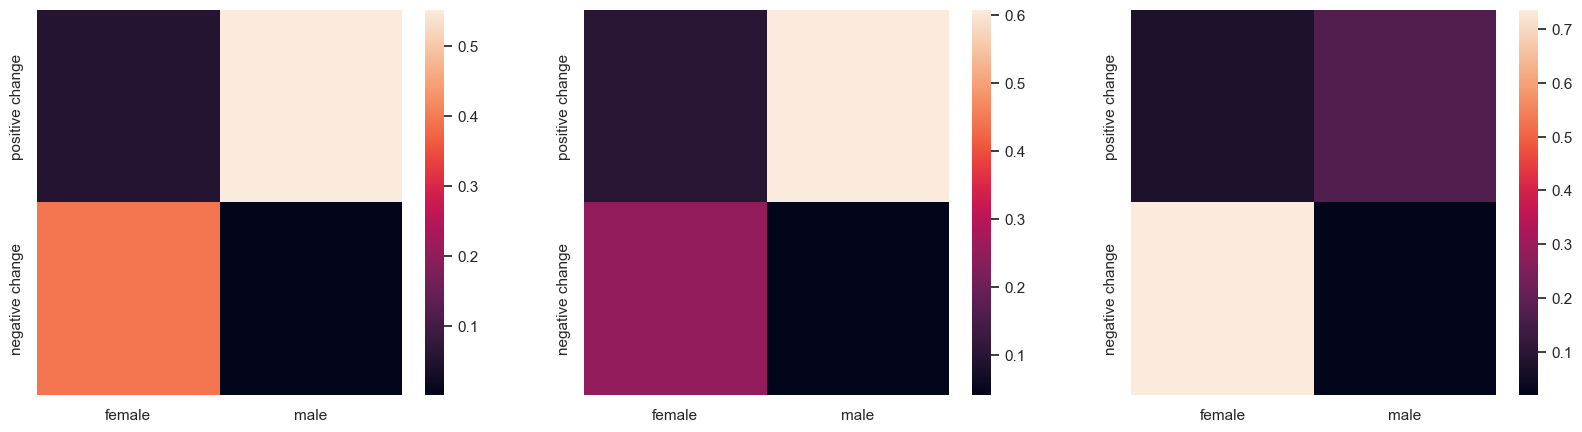

In [183]:
fig, axs = plt.subplots(1,3, figsize=(20,5), sharex=True)

sns.heatmap(make_heatmap(dutch, 'lfr_change'), ax=axs[0])
sns.heatmap(make_heatmap(dutch, 'adv_change'), ax=axs[1])
#sns.heatmap(make_heatmap(dutch, 'roc_change'), ax=axs[2])
sns.heatmap(make_heatmap(dutch, 'adveq_change'), ax=axs[2])
#sns.heatmap(make_heatmap(dutch, 'eq_change'), ax=axs[4])

In [207]:
num_lfr = len(dutch[dutch.lfr_change!=0])
lfr_changes = dutch.groupby(['sex', 'lfr_change']).count().reset_index()
htmp_lfr = np.array(lfr_changes[lfr_changes.lfr_change!=0][['sex', 'lfr_change', 'biased_pred']].biased_pred).reshape((2,2)).T
htmp_lfr = pd.DataFrame(htmp_lfr/num_lfr*100, columns=['female', 'male'], index=[r'$1 \rightarrow 0$', r'$0 \rightarrow 1$'])
htmp_lfr

,female,male
$1 \rightarrow 0$,5.479675,55.105691
$0 \rightarrow 1$,39.252033,0.162602


In [216]:
num_adv = len(dutch[dutch.adv_change!=0])
adv_changes = dutch.groupby(['sex', 'adv_change']).count().reset_index()[['sex', 'adv_change', 'biased_pred']]
adv_changes = adv_changes[adv_changes.adv_change!=0]
adv_changes.biased_pred = adv_changes.biased_pred / num_adv * 100
np.array(adv_changes.biased_pred).reshape((2,2)).T

array([[10.22377622, 60.75524476],
       [24.83916084,  4.18181818]])

In [215]:
adv_changes

,sex,adv_change,biased_pred
0,0,-1,10.223776
2,0,1,24.839161
3,1,-1,60.755245
5,1,1,4.181818


In [222]:
num_roc = len(dutch[dutch.roc_change!=0])
roc_changes = dutch.groupby(['sex', 'roc_change']).count().reset_index()[['sex', 'roc_change', 'biased_pred']]
#np.array(roc_changes[roc_changes.roc_change!=0].biased_pred).reshape((2,2)).T
roc_changes[roc_changes.roc_change!=0]#.biased_pred / num_roc

,sex,roc_change,biased_pred
1,1,-1.0,5209


In [241]:
num_adv = len(dutch[dutch.adveq_change!=0])
adv_changes = dutch.groupby(['sex', 'adveq_change']).count().reset_index()[['sex', 'adveq_change', 'biased_pred']]
adv_changes = adv_changes[adv_changes.adveq_change!=0]
adv_changes.biased_pred = adv_changes.biased_pred / num_adv * 100
np.array(adv_changes.biased_pred).reshape((2,2)).T

array([[ 7.30351945, 17.14739349],
       [73.59089706,  1.95819   ]])

In [239]:
adv_changes

,sex,adveq_change,biased_pred
0,0,-1,7.303519
2,0,1,73.590897
3,1,-1,17.147393
5,1,1,1.958190


In [242]:
num_adv = len(dutch[dutch.eq_change!=0])
adv_changes = dutch.groupby(['sex', 'eq_change']).count().reset_index()[['sex', 'eq_change', 'biased_pred']]
adv_changes = adv_changes[adv_changes.eq_change!=0]
adv_changes.biased_pred = adv_changes.biased_pred / num_adv * 100
np.array(adv_changes.biased_pred).reshape((2,2)).T

ValueError: cannot reshape array of size 3 into shape (2,2)

In [243]:
adv_changes

,sex,eq_change,biased_pred
0,0,-1,14.831574
2,0,1,14.555053
3,1,-1,70.613374


<AxesSubplot:>

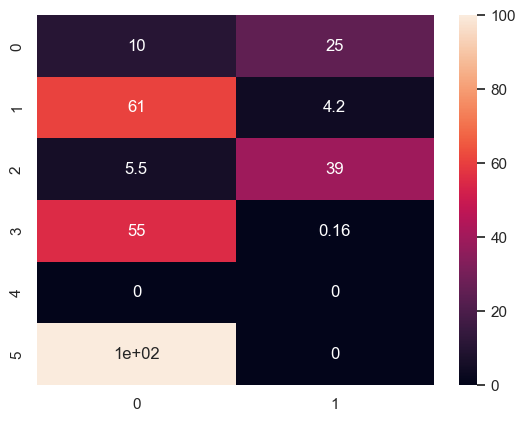

In [227]:
sns.heatmap(np.concatenate((
    np.array(adv_changes.biased_pred).reshape((2,2)).T, 
    htmp_lfr.values,
    [[0, 100.0], [0, 0]]
               )), annot=True)

In [235]:
df_lfr = adult.groupby(['sex', 'lfr_change']).count()[['age']].reset_index()
df_lfr = df_lfr[df_lfr.lfr_change!=0]
df_lfr.age = df_lfr.age / len(adult[adult.lfr_change!=0])
df_lfr

,sex,lfr_change,age
0,female,-1,0.022716
2,female,1,0.271075
3,male,-1,0.640081
5,male,1,0.066128


In [236]:
df_adv = adult.groupby(['sex', 'adv_change']).count()[['age']].reset_index()
df_adv = df_adv[df_adv.adv_change!=0]
df_adv.age = df_adv.age / len(adult[adult.adv_change!=0])
df_adv

,sex,adv_change,age
0,female,-1.0,0.002240
2,female,1.0,0.164054
3,male,-1.0,0.824748
5,male,1.0,0.008959


In [237]:
df_adv = adult.groupby(['sex', 'roc_change']).count()[['age']].reset_index()
df_adv = df_adv[df_adv.roc_change!=0]
df_adv.age = df_adv.age / len(adult[adult.roc_change!=0])
df_adv

,sex,roc_change,age
1,male,-1.0,1.0


In [249]:
credit.groupby(['sex', 'adv_eq_change']).count()

biased_pred  target  lfr_pred  adv_dp_pred  roc_pred  \
sex adv_eq_change                                                         
0   -1                     410     410       410          410       410   
     0                    8642    8642      8642         8642      8642   
     1                      57      57        57           57        57   
1   -1                     330     330       330          330       330   
     0                    5523    5523      5523         5523      5523   
     1                      38      38        38           38        38   

                   adv_eq_pred  eq_pred  lfr_change  adv_dp_change  \
sex adv_eq_change                                                    
0   -1                     410      410         410            410   
     0                    8642     8642        8642           8642   
     1                      57       57          57             57   
1   -1                     330      330         330            330   
     0                    5523     5523        5523           5523   
     1                      38       38          38             38   

                   roc_change  eq_change  
sex adv_eq_change                         
0   -1                    410        410  
     0                   8642       8642  
     1                     57         57  
1   -1                    330        330  
     0                   5523       5523  
     1                     38         38

# Q3: who / why ?

In [113]:
dutch_scores = pd.read_csv('../results/dutch/q3_table_eo.csv').rename({'Unnamed: 0': 'index'}, axis=1).set_index('index')

In [114]:
dutch_scores.head()

,sex,biased_pred,biased_score,adveq_pred,eq_pred,target,eq_change,adveq_change
index,,,,,,,,
6235,1,0,0.390266,0,0,1,0,0
49276,0,0,0.026283,0,0,0,0,0
7891,0,0,0.061746,0,0,0,0,0
17572,1,1,0.925398,1,1,1,0,0
34628,0,0,0.069756,0,0,0,0,0


In [115]:
dutch.head()

,sex,biased_pred,lfr_pred,adv_pred,adveq_pred,eq_pred,roc_pred,target,eq_change,adv_change,lfr_change,roc_change,adveq_change
index,,,,,,,,,,,,,
6235,1,0,0,0,0,0,0.0,1,0,0,0,0.0,0
49276,0,0,0,0,0,0,0.0,0,0,0,0,0.0,0
7891,0,0,0,0,0,0,0.0,0,0,0,0,0.0,0
17572,1,1,1,1,1,1,1.0,1,0,0,0,0.0,0
34628,0,0,0,1,0,0,0.0,0,0,1,0,0.0,0


<AxesSubplot:xlabel='biased_score', ylabel='Count'>

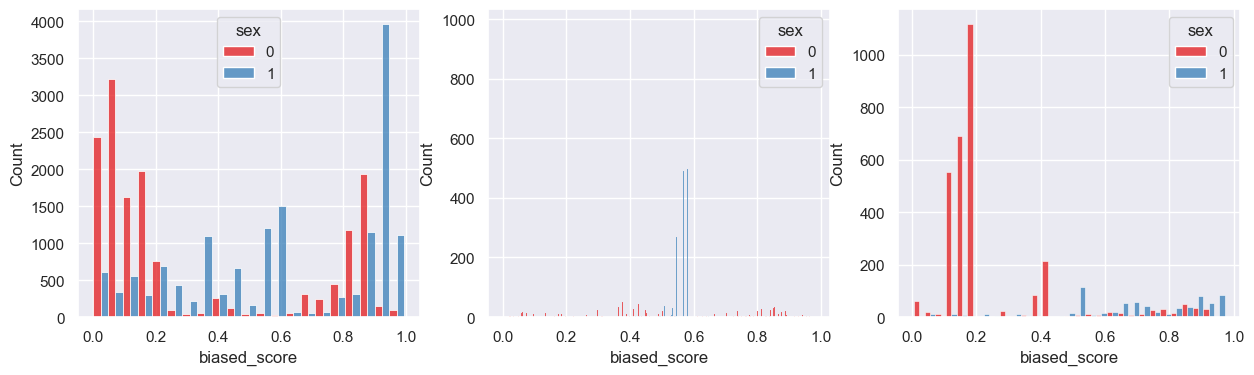

In [116]:
fig, axs = plt.subplots(1,3, figsize=(15,4))

sns.histplot(
    data = dutch_scores,
    x = 'biased_score',
    hue='sex',
    multiple='dodge',
    ax=axs[0]
)

sns.histplot(
    data = dutch_scores.loc[dutch[dutch.eq_change!=0].index],
    x = 'biased_score',
    hue='sex',
    multiple='dodge',
    ax=axs[1]
)

sns.histplot(
    data = dutch_scores.loc[dutch[dutch.adveq_change!=0].index],
    x = 'biased_score',
    hue='sex',
    multiple='dodge',
    ax=axs[2]
)

In [117]:
tn_priv = len(dutch[(dutch.target==0) & (dutch.sex==1)])
tn_disadv = len(dutch[(dutch.target==0) & (dutch.sex==0)])

tp_priv = len(dutch[(dutch.target==1) & (dutch.sex==1)])
tp_disadv = len(dutch[(dutch.target==1) & (dutch.sex==0)])

In [120]:
fpr_priv, tpr_priv = metrics.confusion_matrix(
        dutch_scores[dutch_scores.sex==1].target,
        dutch_scores[dutch_scores.sex==1].biased_pred
    )[[0,1],1]
print('Biased:')
print('Men:')
print(f'FPR = {fpr_priv / tn_priv * 100}, TPR = {tpr_priv / tp_priv * 100}')

fpr_priv, tpr_priv = metrics.confusion_matrix(
        dutch_scores[dutch_scores.sex==0].target,
        dutch_scores[dutch_scores.sex==0].biased_pred
    )[[0,1],1]

print('Women:')
print(f'FPR = {fpr_priv / tn_disadv * 100}, TPR = {tpr_priv / tp_disadv * 100}')
print()

fpr_priv, tpr_priv = metrics.confusion_matrix(
        dutch_scores[dutch_scores.sex==1].target,
        dutch_scores[dutch_scores.sex==1].eq_pred
    )[[0,1],1]

print('Equal Odds')
print('Men:')
print(f'FPR = {fpr_priv / tn_priv * 100}, TPR = {tpr_priv / tp_priv * 100}')

fpr_priv, tpr_priv = metrics.confusion_matrix(
        dutch_scores[dutch_scores.sex==0].target,
        dutch_scores[dutch_scores.sex==0].eq_pred
    )[[0,1],1]

print('Women:')
print(f'FPR = {fpr_priv / tn_disadv * 100}, TPR = {tpr_priv / tp_disadv * 100}')
print()

fpr_priv, tpr_priv = metrics.confusion_matrix(
        dutch_scores[dutch_scores.sex==1].target,
        dutch_scores[dutch_scores.sex==1].adveq_pred
    )[[0,1],1]

print('Adversarial')
print('Men:')
print(f'FPR = {fpr_priv / tn_priv * 100}, TPR = {tpr_priv / tp_priv * 100}')

fpr_priv, tpr_priv = metrics.confusion_matrix(
        dutch_scores[dutch_scores.sex==0].target,
        dutch_scores[dutch_scores.sex==0].adveq_pred
    )[[0,1],1]

print('Women:')
print(f'FPR = {fpr_priv / tn_disadv * 100}, TPR = {tpr_priv / tp_disadv * 100}')

Biased:
Men:
FPR = 31.933953978570173, TPR = 85.32354193273733
Women:
FPR = 7.369771112865036, TPR = 75.84754262788364

Equal Odds
Men:
FPR = 10.468997013876692, TPR = 68.22051936994465
Women:
FPR = 10.280189423835832, TPR = 67.70310932798395

Adversarial
Men:
FPR = 30.01932197435447, TPR = 80.51298424861643
Women:
FPR = 28.94632991318074, TPR = 81.76529588766299


In [125]:
dutch_scores[dutch_scores.eq_change==1].describe()[['sex', 'biased_pred', 'biased_score', 'target']]

,sex,biased_pred,biased_score,target
count,554.0,554.0,554.000000,554.000000
mean,0.0,0.0,0.306090,0.270758
std,0.0,0.0,0.152029,0.444753
min,0.0,0.0,0.003440,0.000000
25%,0.0,0.0,0.164110,0.000000
50%,0.0,0.0,0.380157,0.000000
75%,0.0,0.0,0.426537,1.000000
max,0.0,0.0,0.491952,1.000000


In [126]:
dutch_scores[dutch_scores.eq_change==-1].describe()[['sex', 'biased_pred', 'biased_score', 'target']]

,sex,biased_pred,biased_score,target
count,3494.000000,3494.0,3494.000000,3494.000000
mean,0.809674,1.0,0.614399,0.619061
std,0.392615,0.0,0.108047,0.485687
min,0.000000,1.0,0.502967,0.000000
25%,1.000000,1.0,0.568566,0.000000
50%,1.000000,1.0,0.574561,1.000000
75%,1.000000,1.0,0.580453,1.000000
max,1.000000,1.0,0.979433,1.000000


In [127]:
dutch_scores[dutch_scores.adveq_change==1].describe()[['sex', 'biased_pred', 'biased_score', 'target']]

,sex,biased_pred,biased_score,target
count,2874.000000,2874.0,2874.000000,2874.000000
mean,0.031315,0.0,0.192038,0.192415
std,0.174199,0.0,0.087673,0.394266
min,0.000000,0.0,0.007231,0.000000
25%,0.000000,0.0,0.164110,0.000000
50%,0.000000,0.0,0.175610,0.000000
75%,0.000000,0.0,0.186554,0.000000
max,1.000000,0.0,0.494044,1.000000


In [128]:
dutch_scores[dutch_scores.adveq_change==-1].describe()[['sex', 'biased_pred', 'biased_score', 'target']]

,sex,biased_pred,biased_score,target
count,953.000000,953.0,953.000000,953.000000
mean,0.683106,1.0,0.748226,0.745016
std,0.465510,0.0,0.149784,0.436081
min,0.000000,1.0,0.502967,0.000000
25%,0.000000,1.0,0.631487,0.000000
50%,1.000000,1.0,0.762499,1.000000
75%,1.000000,1.0,0.881015,1.000000
max,1.000000,1.0,0.971371,1.000000


In [130]:
xtest = pd.read_csv('../results/dutch/data_for_tsne.csv').rename({'Unnamed: 0': 'index'}, axis=1).set_index('index')
xtest.head()

,age,prev_residence_place,edu_level,Marital_status,moved_recently,citizenship_europe,citizenship_netherlands,citizenship_rest_of_world,country_birth_europe,country_birth_netherlands,country_birth_rest_of_world,economic_status_111,economic_status_112,economic_status_120,marital_status_divorced,marital_status_married,marital_status_single,marital_status_widowed
index,,,,,,,,,,,,,,,,,,
6235,1.160540,-0.15703,-0.972347,0.270881,-0.15703,-0.11686,0.141013,-0.077852,-0.162263,0.280256,-0.222497,0.417491,-0.274791,-0.291301,-0.250593,0.802157,-0.692149,-0.09281
49276,-0.971383,-0.15703,-1.737869,0.270881,-0.15703,-0.11686,0.141013,-0.077852,-0.162263,0.280256,-0.222497,0.417491,-0.274791,-0.291301,-0.250593,0.802157,-0.692149,-0.09281
7891,-0.118614,-0.15703,-0.972347,0.270881,-0.15703,-0.11686,0.141013,-0.077852,-0.162263,0.280256,-0.222497,0.417491,-0.274791,-0.291301,-0.250593,0.802157,-0.692149,-0.09281
17572,-0.118614,-0.15703,1.324218,0.270881,-0.15703,-0.11686,0.141013,-0.077852,-0.162263,0.280256,-0.222497,0.417491,-0.274791,-0.291301,-0.250593,0.802157,-0.692149,-0.09281
34628,-0.544999,-0.15703,-0.206825,0.270881,-0.15703,-0.11686,0.141013,-0.077852,-0.162263,-3.568167,4.494441,0.417491,-0.274791,-0.291301,-0.250593,0.802157,-0.692149,-0.09281


In [86]:
d = dutch.loc[dutch_scores[dutch_scores.biased_score<0.6].index]
d[d.eq_change!=0]

,sex,biased_pred,lfr_pred,adv_pred,adveq_pred,eq_pred,roc_pred,target,eq_change,adv_change,lfr_change,roc_change,adveq_change
index,,,,,,,,,,,,,
31303,1,1,0,1,1,0,0.0,1,-1,0,-1,-1.0,0
41667,1,1,0,0,1,0,0.0,0,-1,-1,-1,-1.0,0
31916,0,0,0,0,0,1,0.0,0,1,0,0,0.0,0
35787,0,0,1,1,0,1,0.0,0,1,1,1,0.0,0
24105,1,1,0,0,1,0,0.0,1,-1,-1,-1,-1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17192,1,1,0,0,1,0,0.0,1,-1,-1,-1,-1.0,0
15116,1,1,0,0,0,0,0.0,1,-1,-1,-1,-1.0,-1
35345,1,1,0,0,1,0,0.0,0,-1,-1,-1,-1.0,0


In [133]:
import matplotlib.patches as mpatches


In [131]:
from sklearn.manifold import TSNE

tsne_df = TSNE(n_components=2, learning_rate='auto',
                   init='random', perplexity=(50)).fit_transform(xtest)


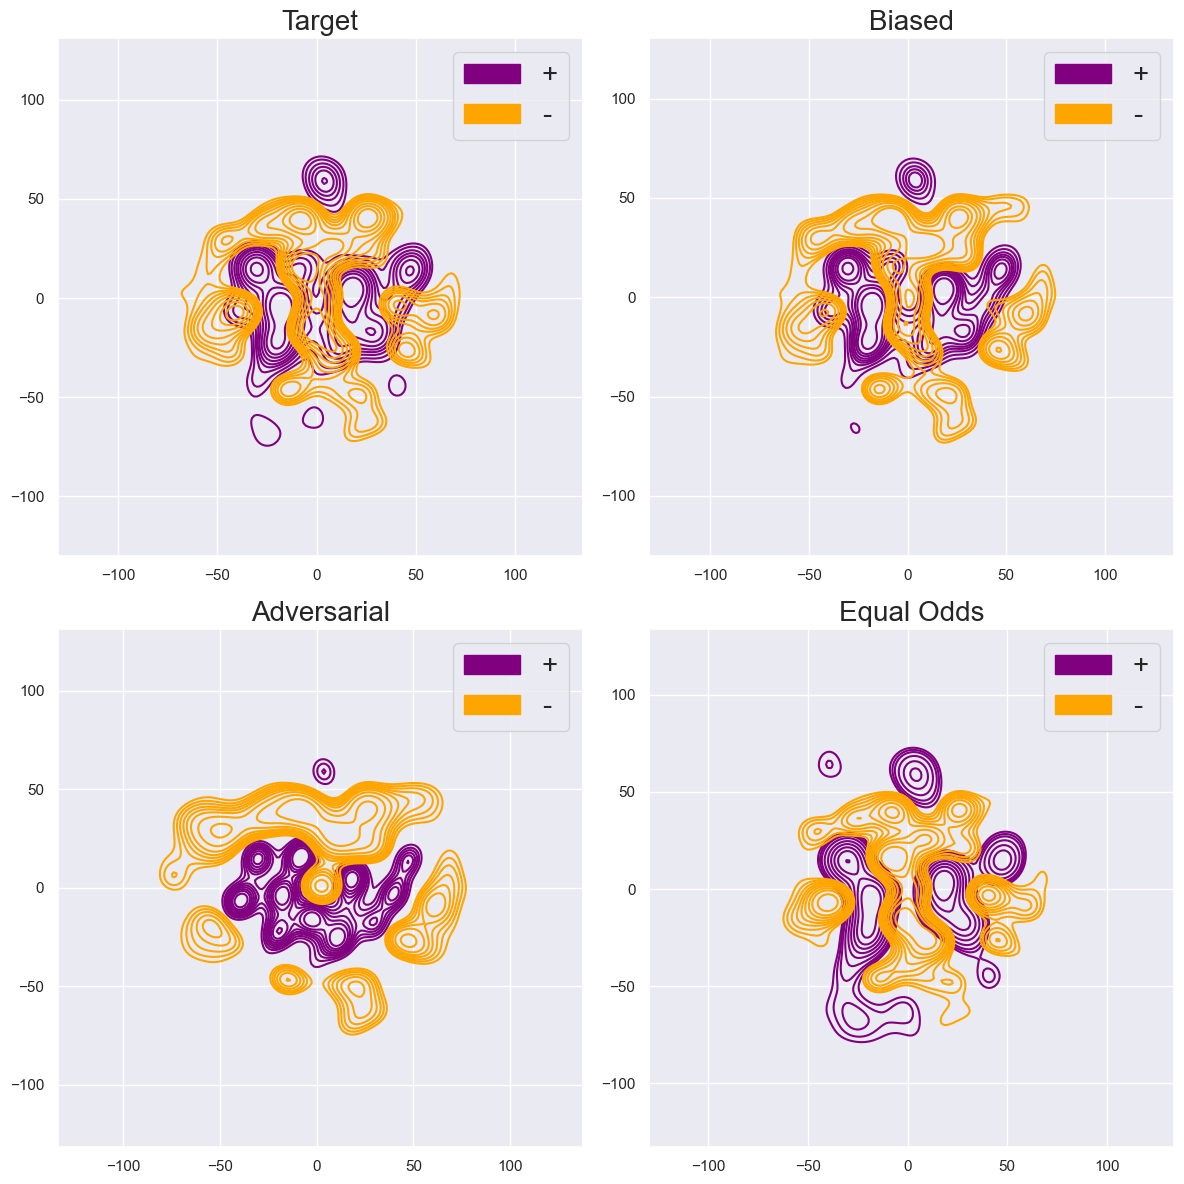

In [141]:
all_df = dutch_scores.assign(c1 = tsne_df[:,0],
             c2 = tsne_df[:,1])

plot_pos_adv = all_df.loc[dutch_scores[dutch_scores.adveq_pred==1].index]
plot_neg_adv = all_df.loc[dutch_scores[dutch_scores.adveq_pred==0].index]
plot_pos_eq = all_df.loc[dutch_scores[dutch_scores.eq_pred==1].index]
plot_neg_eq = all_df.loc[dutch_scores[dutch_scores.eq_pred==0].index]
plot_pos_biased = all_df.loc[dutch_scores[dutch_scores.biased_pred==1].index]
plot_neg_biased = all_df.loc[dutch_scores[dutch_scores.biased_pred==0].index]

plot_pos_target = all_df.loc[dutch_scores[dutch_scores.target==1].index]
plot_neg_target = all_df.loc[dutch_scores[dutch_scores.target==0].index]

fig, axs = plt.subplots(2,2, figsize=(12,12))#, sharex=True, sharey=True)

sns.kdeplot(data=plot_pos_target, x='c1', y='c2', ax=axs[0,0], label='Target, +', fill=False, thresh=0.5, color='Purple')
patch_targetpos = mpatches.Patch(
    color='Purple', label='+'
)

sns.kdeplot(data=plot_neg_target, x='c1', y='c2', ax=axs[0,0], label='Target, -', fill=False, thresh=.5, color='Orange')
patch_targetneg = mpatches.Patch(
    color='Orange', label='-'
)

sns.kdeplot(data=plot_pos_biased, x='c1', y='c2', ax=axs[0,1], label='Biased, +', fill=False, thresh=0.5, color='Purple')
patch_biasedpos = mpatches.Patch(
    color='Purple', label='+'
)

sns.kdeplot(data=plot_neg_biased, x='c1', y='c2', ax=axs[0,1], label='Biased, -', fill=False, thresh=.5, color='Orange')
patch_biasedneg = mpatches.Patch(
    color='Orange', label='-'
)

sns.kdeplot(data=plot_pos_adv, x='c1', y='c2', ax=axs[1,0], label='Adv, +', fill=False, thresh=0.5, color='Purple')
patch_advpos = mpatches.Patch(
    color='Purple', label='+'
)

sns.kdeplot(data=plot_neg_adv, x='c1', y='c2', ax=axs[1,0], label='Adv, -', fill=False, thresh=0.5, color='Orange')
patch_advneg = mpatches.Patch(
    color='Orange', label='-'
)

sns.kdeplot(data=plot_pos_eq, x='c1', y='c2', ax=axs[1,1], label='EO, +', fill=False, thresh=0.5, color='Purple')
patch_eqpos = mpatches.Patch(
    color='Purple', label='+'
)

sns.kdeplot(data=plot_neg_eq, x='c1', y='c2', ax=axs[1,1], label='EO, -', fill=False, thresh=.5, color='Orange')
patch_eqneg = mpatches.Patch(
    color='Orange', label='-'
)

#label_patches = [patch_roc, patch_adv, patch_lfr, patch_ae]
#label_patches = [patch_all, patch_adv, patch_lfr, patch_roc]


axs[0,0].legend(handles=[patch_targetpos, patch_targetneg], fontsize=20)

axs[0,0].set_title('Target', fontsize=20)
axs[0,0].set_xlabel('')
axs[0,0].set_ylabel('')

axs[0,1].legend(handles=[patch_biasedpos, patch_biasedneg], fontsize=20)

axs[0,1].set_title('Biased', fontsize=20)
axs[0,1].set_xlabel('')
axs[0,1].set_ylabel('')

axs[1,0].legend(handles=[patch_advpos, patch_advneg], fontsize=20)

axs[1,0].set_title('Adversarial', fontsize=20)
axs[1,0].set_xlabel('')
axs[1,0].set_ylabel('')

axs[1,1].legend(handles=[patch_eqpos, patch_eqneg], fontsize=20)

axs[1,1].set_title('Equal Odds', fontsize=20)
axs[1,1].set_xlabel('')
axs[1,1].set_ylabel('')

#plt.xlim((-75, 75))
#plt.ylim((-75, 75))

#plt.savefig('../figs/dutch/tsne_all.pdf')
#plt.savefig('../figs/dutch/tsne_all.png')
plt.tight_layout()

In [142]:
plot_pos_adv.head(1)

,sex,biased_pred,biased_score,adveq_pred,eq_pred,target,eq_change,adveq_change,c1,c2
index,,,,,,,,,,
17572,1,1,0.925398,1,1,1,0,0,-19.366655,-22.005468


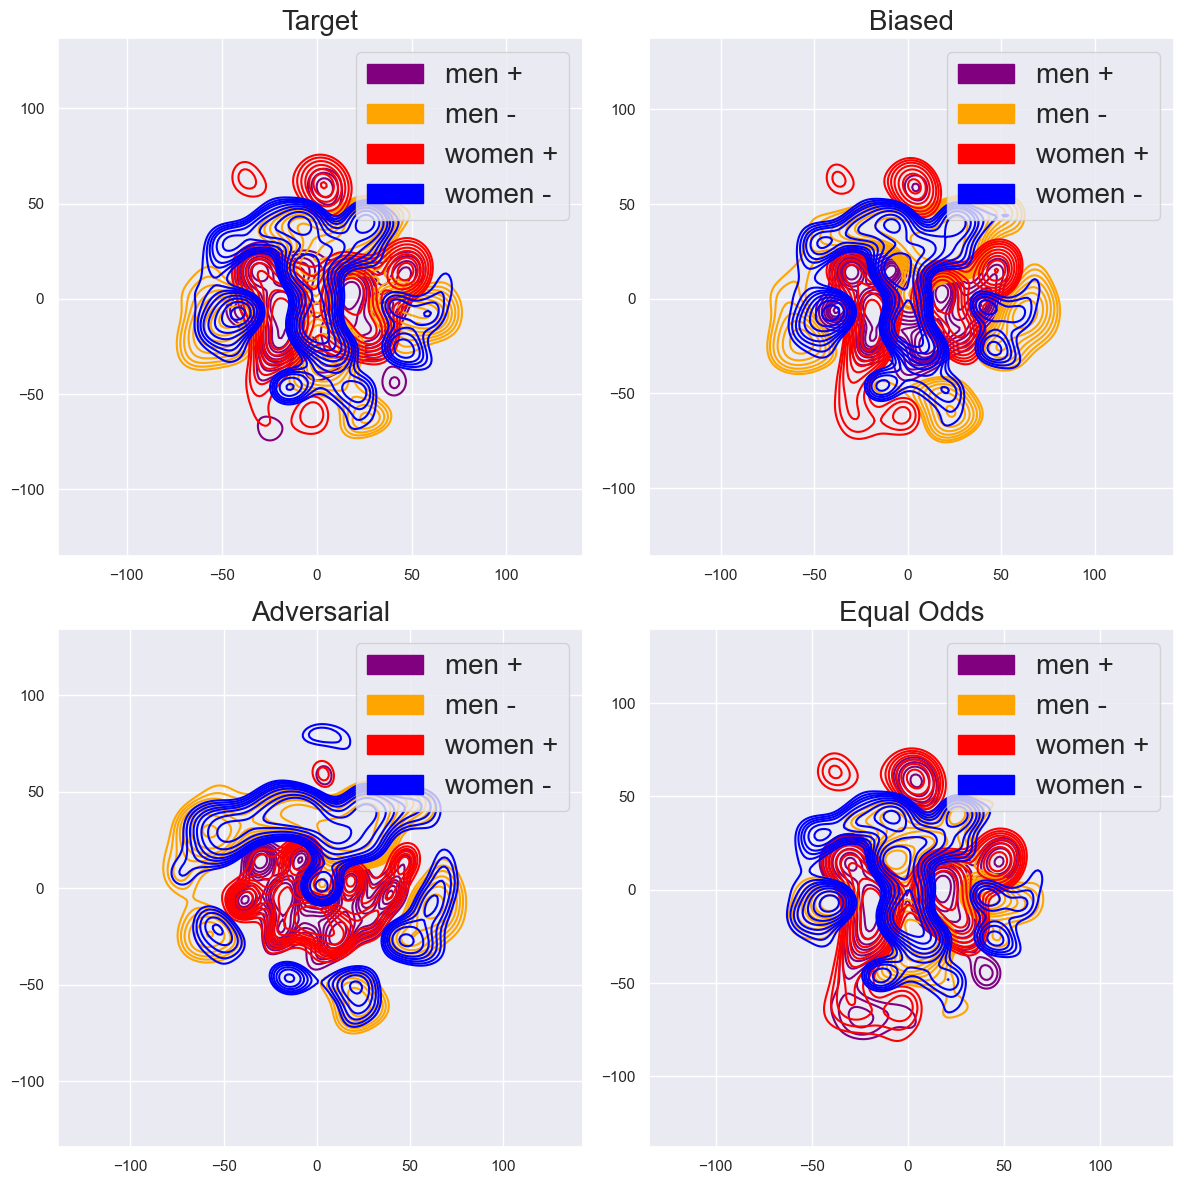

In [197]:
all_df = dutch_scores.assign(c1 = tsne_df[:,0],
             c2 = tsne_df[:,1])

plot_pos_adv = all_df.loc[dutch_scores[dutch_scores.adveq_pred==1].index]
plot_neg_adv = all_df.loc[dutch_scores[dutch_scores.adveq_pred==0].index]
plot_pos_eq = all_df.loc[dutch_scores[dutch_scores.eq_pred==1].index]
plot_neg_eq = all_df.loc[dutch_scores[dutch_scores.eq_pred==0].index]
plot_pos_biased = all_df.loc[dutch_scores[dutch_scores.biased_pred==1].index]
plot_neg_biased = all_df.loc[dutch_scores[dutch_scores.biased_pred==0].index]

plot_pos_target = all_df.loc[dutch_scores[dutch_scores.target==1].index]
plot_neg_target = all_df.loc[dutch_scores[dutch_scores.target==0].index]

fig, axs = plt.subplots(2,2, figsize=(12,12))#, sharex=True, sharey=True)

sns.kdeplot(data=plot_pos_target[plot_pos_target.sex==1], x='c1', y='c2', ax=axs[0,0], label='Target, +', fill=False, thresh=0.5, color='Purple')
patch_targetpos_men = mpatches.Patch(
    color='Purple', label='men +'
)

sns.kdeplot(data=plot_neg_target[plot_neg_target.sex==1], x='c1', y='c2', ax=axs[0,0], label='Target, -', fill=False, thresh=.5, color='Orange')
patch_targetneg_men = mpatches.Patch(
    color='Orange', label='men -'
)

sns.kdeplot(data=plot_pos_target[plot_pos_target.sex==0], x='c1', y='c2', ax=axs[0,0], label='Target, +', fill=False, thresh=0.5, color='Red')
patch_targetpos_women = mpatches.Patch(
    color='Red', label='women +'
)

sns.kdeplot(data=plot_neg_target[plot_neg_target.sex==0], x='c1', y='c2', ax=axs[0,0], label='Target, -', fill=False, thresh=.5, color='Blue')
patch_targetneg_women = mpatches.Patch(
    color='Blue', label='women -'
)

#### BIASED ####

sns.kdeplot(data=plot_pos_biased[plot_pos_biased.sex==1], x='c1', y='c2', ax=axs[0,1], label='Biased, +', fill=False, thresh=0.5, color='Purple')
patch_biasedpos_men = mpatches.Patch(
    color='Purple', label='men +'
)

sns.kdeplot(data=plot_neg_biased[plot_neg_biased.sex==1], x='c1', y='c2', ax=axs[0,1], label='Biased, -', fill=False, thresh=.5, color='Orange')
patch_biasedneg_men = mpatches.Patch(
    color='Orange', label='men -'
)

sns.kdeplot(data=plot_pos_biased[plot_pos_biased.sex==0], x='c1', y='c2', ax=axs[0,1], label='Biased, +', fill=False, thresh=0.5, color='Red')
patch_biasedpos_women = mpatches.Patch(
    color='Red', label='women +'
)

sns.kdeplot(data=plot_neg_biased[plot_neg_biased.sex==0], x='c1', y='c2', ax=axs[0,1], label='Biased, -', fill=False, thresh=.5, color='Blue')
patch_biasedneg_women = mpatches.Patch(
    color='Blue', label='women -'
)


#### ADVERSARIAL ####

sns.kdeplot(data=plot_pos_adv[plot_pos_adv.sex==1], x='c1', y='c2', ax=axs[1,0], label='Adv, +', fill=False, thresh=0.5, color='Purple')
patch_advpos_men = mpatches.Patch(
    color='Purple', label='men +'
)

sns.kdeplot(data=plot_neg_adv[plot_neg_adv.sex==1], x='c1', y='c2', ax=axs[1,0], label='Adv, -', fill=False, thresh=0.5, color='Orange')
patch_advneg_men = mpatches.Patch(
    color='Orange', label='men -'
)

sns.kdeplot(data=plot_pos_adv[plot_pos_adv.sex==0], x='c1', y='c2', ax=axs[1,0], label='Adv, +', fill=False, thresh=0.5, color='Red')
patch_advpos_women = mpatches.Patch(
    color='Red', label='women +'
)

sns.kdeplot(data=plot_neg_adv[plot_neg_adv.sex==0], x='c1', y='c2', ax=axs[1,0], label='Adv, -', fill=False, thresh=0.5, color='Blue')
patch_advneg_women = mpatches.Patch(
    color='Blue', label='women -'
)

#### EQUAL ODDS ####

sns.kdeplot(data=plot_pos_eq[plot_pos_eq.sex==1], x='c1', y='c2', ax=axs[1,1], label='EO, +', fill=False, thresh=0.5, color='Purple')
patch_eqpos_men = mpatches.Patch(
    color='Purple', label='men +'
)

sns.kdeplot(data=plot_neg_eq[plot_neg_eq.sex==1], x='c1', y='c2', ax=axs[1,1], label='EO, -', fill=False, thresh=.5, color='Orange')
patch_eqneg_men = mpatches.Patch(
    color='Orange', label='men -'
)

sns.kdeplot(data=plot_pos_eq[plot_pos_eq.sex==0], x='c1', y='c2', ax=axs[1,1], label='EO, +', fill=False, thresh=0.5, color='Red')
patch_eqpos_women = mpatches.Patch(
    color='Red', label='women +'
)

sns.kdeplot(data=plot_neg_eq[plot_neg_eq.sex==0], x='c1', y='c2', ax=axs[1,1], label='EO, -', fill=False, thresh=.5, color='Blue')
patch_eqneg_women = mpatches.Patch(
    color='Blue', label='women -'
)

#label_patches = [patch_roc, patch_adv, patch_lfr, patch_ae]
#label_patches = [patch_all, patch_adv, patch_lfr, patch_roc]


axs[0,0].legend(handles=[patch_targetpos_men, patch_targetneg_men, patch_targetpos_women, patch_targetneg_women], fontsize=20)

axs[0,0].set_title('Target', fontsize=20)
axs[0,0].set_xlabel('')
axs[0,0].set_ylabel('')

axs[0,1].legend(handles=[patch_biasedpos_men, patch_biasedneg_men, patch_biasedpos_women, patch_biasedneg_women], fontsize=20)

axs[0,1].set_title('Biased', fontsize=20)
axs[0,1].set_xlabel('')
axs[0,1].set_ylabel('')

axs[1,0].legend(handles=[patch_advpos_men, patch_advneg_men, patch_advpos_women, patch_advneg_women], fontsize=20)

axs[1,0].set_title('Adversarial', fontsize=20)
axs[1,0].set_xlabel('')
axs[1,0].set_ylabel('')

axs[1,1].legend(handles=[patch_eqpos_men, patch_eqneg_men, patch_eqpos_women, patch_eqneg_women], fontsize=20)

axs[1,1].set_title('Equal Odds', fontsize=20)
axs[1,1].set_xlabel('')
axs[1,1].set_ylabel('')

#plt.xlim((-75, 75))
#plt.ylim((-75, 75))

#plt.savefig('../figs/dutch/tsne_all.pdf')
#plt.savefig('../figs/dutch/tsne_all.png')
plt.tight_layout()

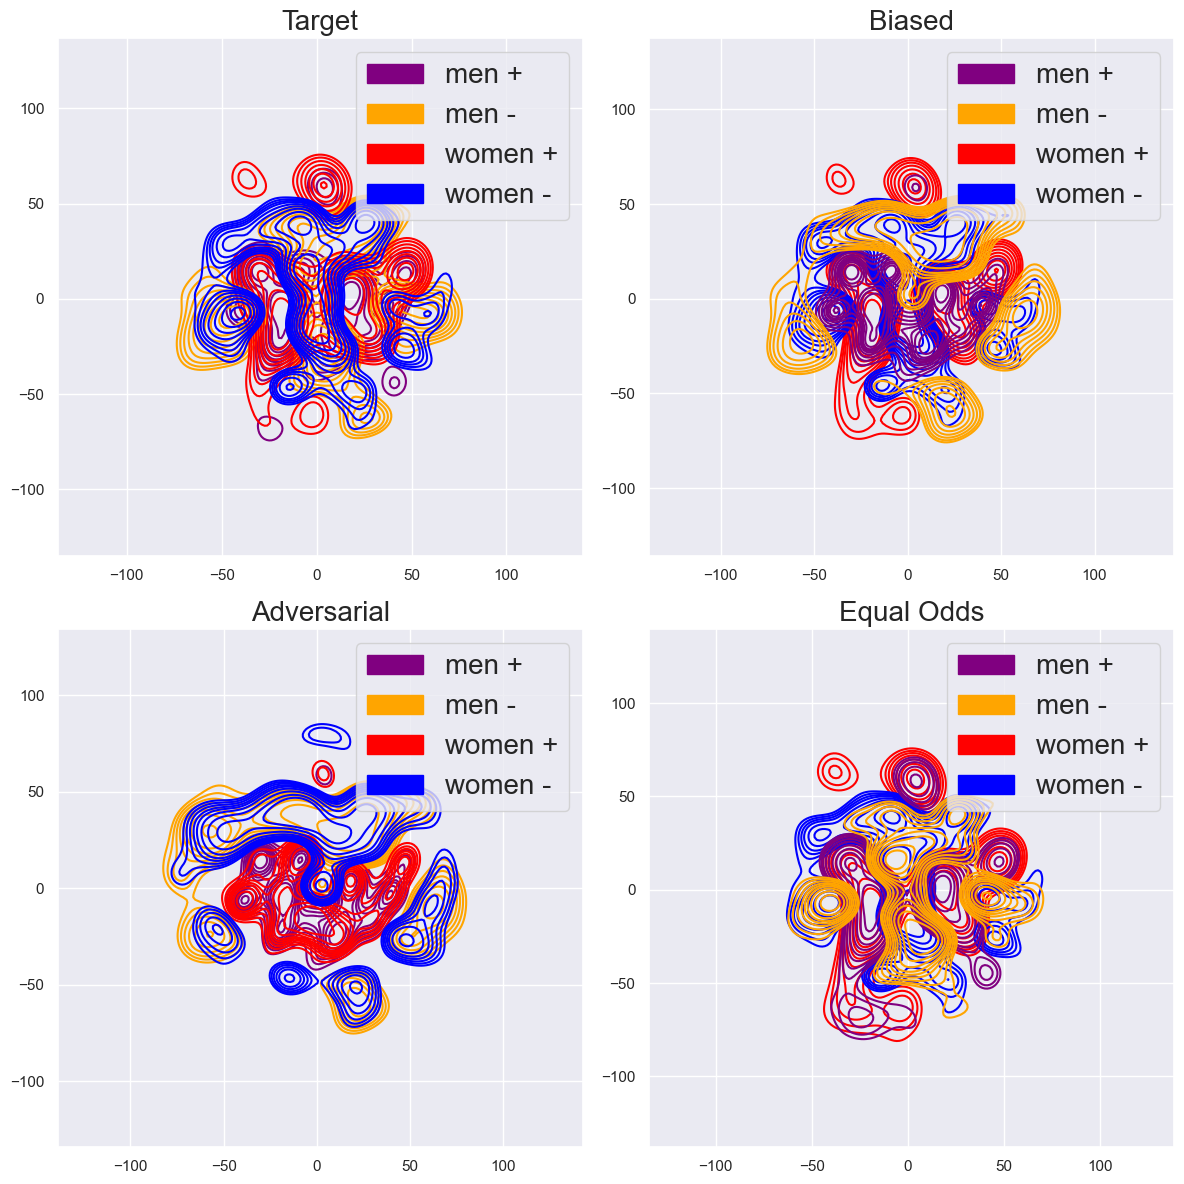

In [199]:
all_df = dutch_scores.assign(c1 = tsne_df[:,0],
             c2 = tsne_df[:,1])

plot_pos_adv = all_df.loc[dutch_scores[dutch_scores.adveq_pred==1].index]
plot_neg_adv = all_df.loc[dutch_scores[dutch_scores.adveq_pred==0].index]
plot_pos_eq = all_df.loc[dutch_scores[dutch_scores.eq_pred==1].index]
plot_neg_eq = all_df.loc[dutch_scores[dutch_scores.eq_pred==0].index]
plot_pos_biased = all_df.loc[dutch_scores[dutch_scores.biased_pred==1].index]
plot_neg_biased = all_df.loc[dutch_scores[dutch_scores.biased_pred==0].index]

plot_pos_target = all_df.loc[dutch_scores[dutch_scores.target==1].index]
plot_neg_target = all_df.loc[dutch_scores[dutch_scores.target==0].index]

fig, axs = plt.subplots(2,2, figsize=(12,12))#, sharex=True, sharey=True)

sns.kdeplot(data=plot_pos_target[plot_pos_target.sex==1], x='c1', y='c2', ax=axs[0,0], label='Target, +', fill=False, thresh=0.5, color='Purple')
patch_targetpos_men = mpatches.Patch(
    color='Purple', label='men +'
)

sns.kdeplot(data=plot_neg_target[plot_neg_target.sex==1], x='c1', y='c2', ax=axs[0,0], label='Target, -', fill=False, thresh=.5, color='Orange')
patch_targetneg_men = mpatches.Patch(
    color='Orange', label='men -'
)

sns.kdeplot(data=plot_pos_target[plot_pos_target.sex==0], x='c1', y='c2', ax=axs[0,0], label='Target, +', fill=False, thresh=0.5, color='Red')
patch_targetpos_women = mpatches.Patch(
    color='Red', label='women +'
)

sns.kdeplot(data=plot_neg_target[plot_neg_target.sex==0], x='c1', y='c2', ax=axs[0,0], label='Target, -', fill=False, thresh=.5, color='Blue')
patch_targetneg_women = mpatches.Patch(
    color='Blue', label='women -'
)

#### BIASED ####

sns.kdeplot(data=plot_pos_biased[plot_pos_biased.sex==0], x='c1', y='c2', ax=axs[0,1], label='Biased, +', fill=False, thresh=0.5, color='Red')
patch_biasedpos_women = mpatches.Patch(
    color='Red', label='women +'
)

sns.kdeplot(data=plot_neg_biased[plot_neg_biased.sex==0], x='c1', y='c2', ax=axs[0,1], label='Biased, -', fill=False, thresh=.5, color='Blue')
patch_biasedneg_women = mpatches.Patch(
    color='Blue', label='women -'
)

sns.kdeplot(data=plot_pos_biased[plot_pos_biased.sex==1], x='c1', y='c2', ax=axs[0,1], label='Biased, +', fill=False, thresh=0.5, color='Purple')
patch_biasedpos_men = mpatches.Patch(
    color='Purple', label='men +'
)

sns.kdeplot(data=plot_neg_biased[plot_neg_biased.sex==1], x='c1', y='c2', ax=axs[0,1], label='Biased, -', fill=False, thresh=.5, color='Orange')
patch_biasedneg_men = mpatches.Patch(
    color='Orange', label='men -'
)


#### ADVERSARIAL ####

sns.kdeplot(data=plot_pos_adv[plot_pos_adv.sex==1], x='c1', y='c2', ax=axs[1,0], label='Adv, +', fill=False, thresh=0.5, color='Purple')
patch_advpos_men = mpatches.Patch(
    color='Purple', label='men +'
)

sns.kdeplot(data=plot_neg_adv[plot_neg_adv.sex==1], x='c1', y='c2', ax=axs[1,0], label='Adv, -', fill=False, thresh=0.5, color='Orange')
patch_advneg_men = mpatches.Patch(
    color='Orange', label='men -'
)

sns.kdeplot(data=plot_pos_adv[plot_pos_adv.sex==0], x='c1', y='c2', ax=axs[1,0], label='Adv, +', fill=False, thresh=0.5, color='Red')
patch_advpos_women = mpatches.Patch(
    color='Red', label='women +'
)

sns.kdeplot(data=plot_neg_adv[plot_neg_adv.sex==0], x='c1', y='c2', ax=axs[1,0], label='Adv, -', fill=False, thresh=0.5, color='Blue')
patch_advneg_women = mpatches.Patch(
    color='Blue', label='women -'
)

#### EQUAL ODDS ####


sns.kdeplot(data=plot_pos_eq[plot_pos_eq.sex==0], x='c1', y='c2', ax=axs[1,1], label='EO, +', fill=False, thresh=0.5, color='Red')
patch_eqpos_women = mpatches.Patch(
    color='Red', label='women +'
)

sns.kdeplot(data=plot_neg_eq[plot_neg_eq.sex==0], x='c1', y='c2', ax=axs[1,1], label='EO, -', fill=False, thresh=.5, color='Blue')
patch_eqneg_women = mpatches.Patch(
    color='Blue', label='women -'
)

sns.kdeplot(data=plot_pos_eq[plot_pos_eq.sex==1], x='c1', y='c2', ax=axs[1,1], label='EO, +', fill=False, thresh=0.5, color='Purple')
patch_eqpos_men = mpatches.Patch(
    color='Purple', label='men +'
)

sns.kdeplot(data=plot_neg_eq[plot_neg_eq.sex==1], x='c1', y='c2', ax=axs[1,1], label='EO, -', fill=False, thresh=.5, color='Orange')
patch_eqneg_men = mpatches.Patch(
    color='Orange', label='men -'
)

#label_patches = [patch_roc, patch_adv, patch_lfr, patch_ae]
#label_patches = [patch_all, patch_adv, patch_lfr, patch_roc]


axs[0,0].legend(handles=[patch_targetpos_men, patch_targetneg_men, patch_targetpos_women, patch_targetneg_women], fontsize=20)

axs[0,0].set_title('Target', fontsize=20)
axs[0,0].set_xlabel('')
axs[0,0].set_ylabel('')

axs[0,1].legend(handles=[patch_biasedpos_men, patch_biasedneg_men, patch_biasedpos_women, patch_biasedneg_women], fontsize=20)

axs[0,1].set_title('Biased', fontsize=20)
axs[0,1].set_xlabel('')
axs[0,1].set_ylabel('')

axs[1,0].legend(handles=[patch_advpos_men, patch_advneg_men, patch_advpos_women, patch_advneg_women], fontsize=20)

axs[1,0].set_title('Adversarial', fontsize=20)
axs[1,0].set_xlabel('')
axs[1,0].set_ylabel('')

axs[1,1].legend(handles=[patch_eqpos_men, patch_eqneg_men, patch_eqpos_women, patch_eqneg_women], fontsize=20)

axs[1,1].set_title('Equal Odds', fontsize=20)
axs[1,1].set_xlabel('')
axs[1,1].set_ylabel('')

#plt.xlim((-75, 75))
#plt.ylim((-75, 75))

#plt.savefig('../figs/dutch/tsne_all.pdf')
#plt.savefig('../figs/dutch/tsne_all.png')
plt.tight_layout()

In [89]:
data = pd.read_csv('../data/dutch/dutch.csv')
data.loc[d.index]

,sex,age,household_position,household_size,prev_residence_place,citizenship,country_birth,edu_level,economic_status,cur_eco_activity,Marital_status,occupation
index,,,,,,,,,,,,
6235,1,11,1122,126,1,1,1,2,111,111,2,2_1
49276,2,6,1122,114,1,1,1,1,111,131,2,5_4_9
7891,2,8,1122,113,1,1,1,2,111,138,2,5_4_9
34628,2,7,1121,112,1,1,3,3,111,135,2,5_4_9
1659,1,8,1210,111,1,1,1,3,111,135,1,5_4_9
...,...,...,...,...,...,...,...,...,...,...,...,...
15617,1,9,1122,113,1,1,1,2,111,122,2,2_1
48562,1,5,1110,113,1,1,1,3,111,135,1,5_4_9
1885,1,10,1122,114,1,1,1,3,111,122,2,5_4_9


In [92]:
data.columns

Index(['sex', ' age', ' household_position', ' household_size',
       ' prev_residence_place', ' citizenship', ' country_birth', ' edu_level',
       ' economic_status', ' cur_eco_activity', ' Marital_status',
       ' occupation'],
      dtype='object')

In [ ]:
fpr_priv, tpr_priv = metrics.confusion_matrix(
        data[data[sensitive_attribute]==priv_value].target,
        data[data[sensitive_attribute]==priv_value].fair_label
    )[[0,1],1]